# This notebook provides sources to every chart and figure mentioned the article.

## Fig 1

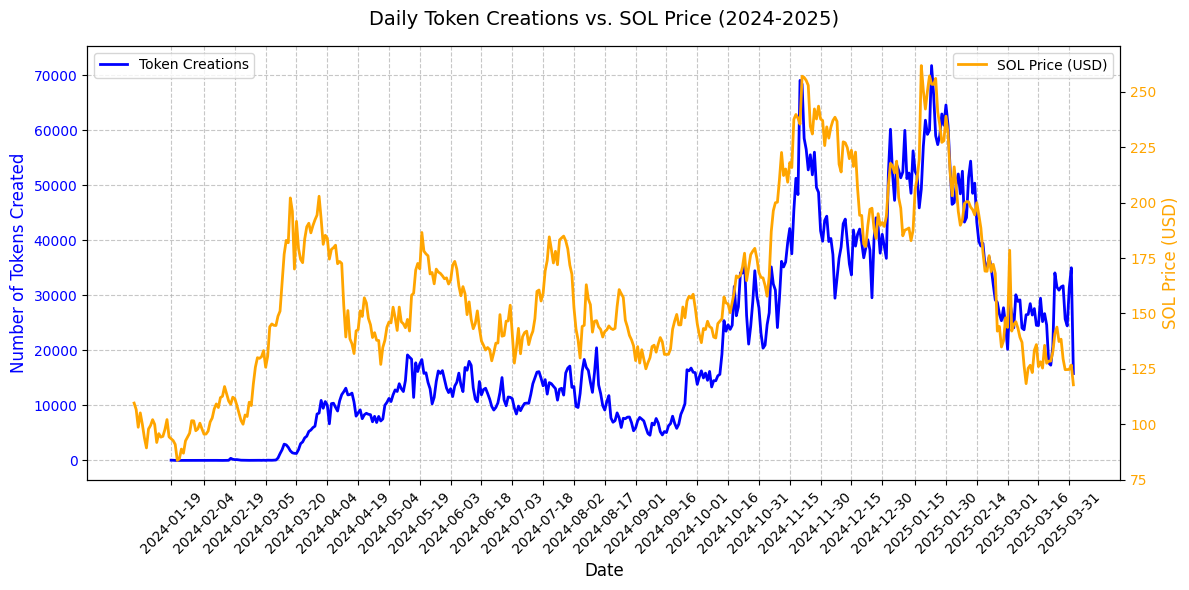

In [1]:
# Daily token creation and price of SOL
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("data/pumpfun_coins_alltime.csv").drop(columns={"Unnamed: 0"})
df['creation_time'] = pd.to_datetime(df.creation_time)
df['date'] = df.creation_time.dt.date

token_counts = df.groupby('date').count()['transaction_id']

sol_price_history = pd.read_csv("price_history/sol.csv")
sol_price_history['Date'] = pd.to_datetime(sol_price_history['Date'])

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Second y-axis sharing the same x-axis

# Plot token creations on ax1 (left y-axis)
ax1.plot(token_counts.index, token_counts, color='blue', linewidth=2, label='Token Creations')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Tokens Created', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot SOL price on ax2 (right y-axis)
ax2.plot(sol_price_history['Date'], sol_price_history['SOL-USD'], color='orange', linewidth=2, label='SOL Price (USD)')
ax2.set_ylabel('SOL Price (USD)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Customize the plot
plt.title('Daily Token Creations vs. SOL Price (2024-2025)', fontsize=14, pad=15)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(token_counts.index[::15])  # Show every 7th date to avoid clutter
ax1.tick_params(axis='x', rotation=45, labelsize=10)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


# Fig 2

/tmp/ipykernel_1547473/2791479871.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gini_by_day = daily_counts.groupby('date').apply(


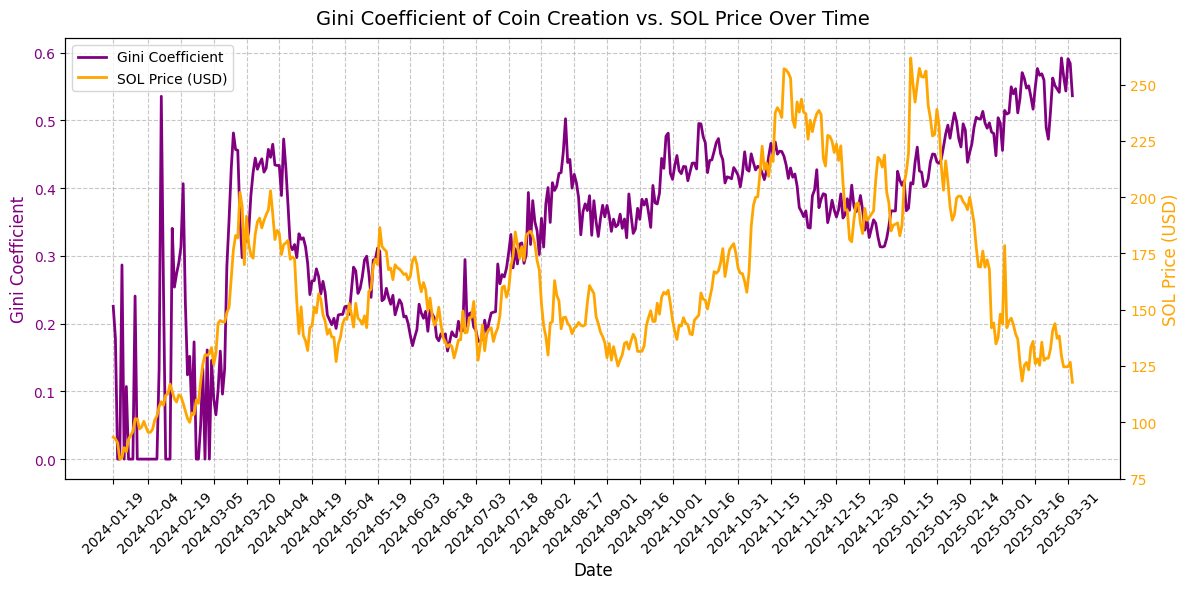

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/pumpfun_coins_alltime.csv").drop(columns={"Unnamed: 0"})
df['creation_time'] = pd.to_datetime(df.creation_time)
df['date'] = df.creation_time.dt.date

sol_price_history = pd.read_csv("price_history/sol.csv")
sol_price_history['Date'] = pd.to_datetime(sol_price_history['Date'])

# Define Gini coefficient function
def gini_coefficient(x):
    x = np.array(x, dtype=np.float64)  # Convert to numpy array
    if len(x) == 0 or np.sum(x) == 0:  # Handle empty or all-zero cases
        return np.nan
    n = len(x)
    diff_sum = np.sum(np.abs(np.subtract.outer(x, x)))  # Sum of absolute differences
    mean_sum = np.sum(x)
    return diff_sum / (2 * n * mean_sum)

# Calculate daily coin counts and Gini coefficient
daily_counts = df.groupby(['date', 'creator_address']).size().reset_index(name='coin_count')
gini_by_day = daily_counts.groupby('date').apply(
    lambda x: gini_coefficient(x['coin_count'].values)
)
gini_df = pd.DataFrame({
    'date': gini_by_day.index,
    'gini': gini_by_day.values
})

# Merge Gini data with SOL prices on date
gini_df['date'] = pd.to_datetime(gini_df['date'])  # Ensure date is datetime
sol_price_history['Date'] = pd.to_datetime(sol_price_history['Date'])  # Ensure date is datetime
# Rename 'Date' to 'date' in sol_price_history for consistency
sol_price_history = sol_price_history.rename(columns={'Date': 'date'})
merged_df = gini_df.merge(sol_price_history[['date', 'SOL-USD']], on='date', how='left')

# Create the plot with dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Gini coefficient on primary y-axis
ax1.plot(merged_df['date'], merged_df['gini'], color='purple', linewidth=2, label='Gini Coefficient')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Gini Coefficient', fontsize=12, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create secondary y-axis for SOL price
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['SOL-USD'], color='orange', linewidth=2, label='SOL Price (USD)')
ax2.set_ylabel('SOL Price (USD)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Customize plot
plt.title('Gini Coefficient of Coin Creation vs. SOL Price Over Time', fontsize=14, pad=10)
ax1.set_xticks(merged_df['date'][::15])  # Show every 15th date
ax1.tick_params(axis='x', rotation=45, labelright=True)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Fig 3

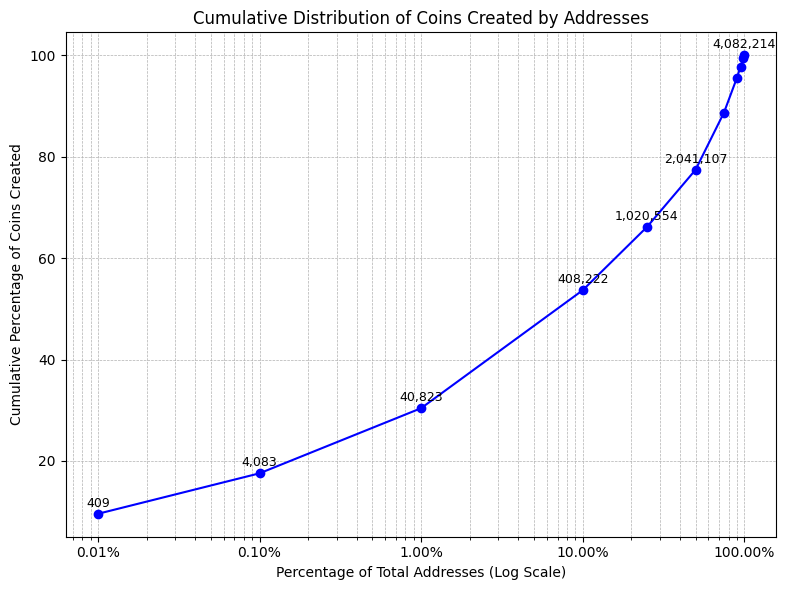

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df = pd.read_csv("data/pumpfun_coins_alltime.csv").drop(columns={"Unnamed: 0"})
df['creation_time'] = pd.to_datetime(df.creation_time)

# Calculate the frequency of coins created per address
address_counts = df['creator_address'].value_counts()

# Total number of coins created and addresses
total_coins = len(df)
total_addresses = len(address_counts)

# Cumulative sum of coins created, normalized to percentage
cumulative_coins = (address_counts / total_coins).cumsum()

# Define specific x-axis points (as percentages of total addresses)
x_axis_raw = np.array([1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])
x_axis = np.searchsorted(np.arange(1, total_addresses + 1) / total_addresses, x_axis_raw)
y_axis = cumulative_coins.iloc[x_axis]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_axis_raw * 100, y_axis * 100, marker='o', linestyle='-', color='b')

# Log scale and custom x-axis formatter
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}%'))

# Label points with number of addresses (skip some for clarity, matching your exclusions)
for i, (x, y) in enumerate(zip(x_axis_raw, y_axis)):
    num_addresses = x_axis[i] + 1  # Number of addresses up to this point
    if i not in [9, 8, 7, 6]:  # Skip 0.9, 0.95, 0.99, 1.0 to avoid clutter
        plt.annotate(f'{num_addresses:,}', (x * 100, y * 100),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

# Customize the plot
plt.xlabel("Percentage of Total Addresses (Log Scale)")
plt.ylabel("Cumulative Percentage of Coins Created")
plt.title("Cumulative Distribution of Coins Created by Addresses")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Fig 4

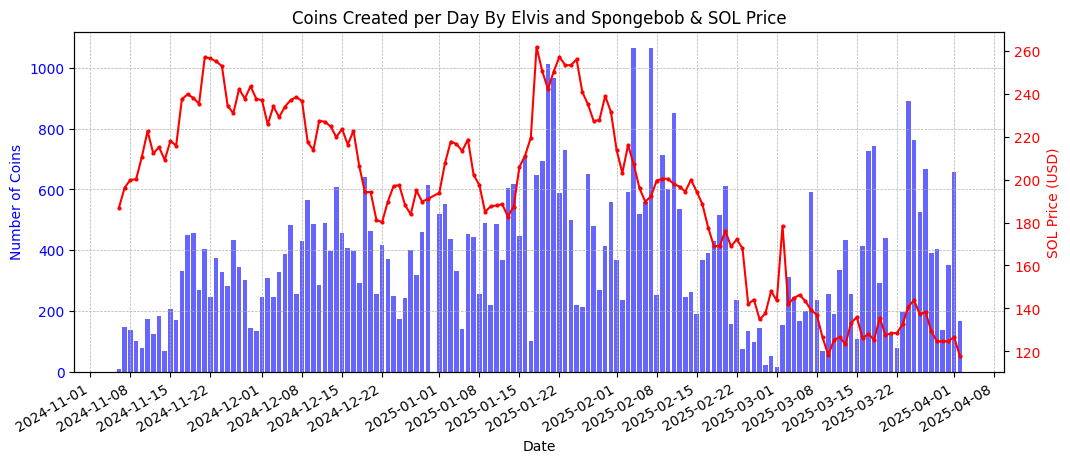

In [5]:
import matplotlib.dates as mdates 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/pumpfun_coins_alltime.csv").drop(columns={"Unnamed: 0"})
df = df[df.creator_address.isin(["6d22FozaKK239PoBYVffkYKA1QPQZE8fC7AQkpmHQfjp","MNhBbrscBPmeid54buiqSgyWa4D8PY6uKHoK2wJsTJN"])].reset_index(drop=True)
df['date'] = pd.to_datetime(df.creation_time).dt.date

price_history = pd.read_csv("price_history/sol.csv")
price_history["Date"] = pd.to_datetime(price_history["Date"]).dt.date  # Ensure date format matches
price_history.set_index("Date", inplace=True)


daily_counts = df["date"].value_counts().sort_index()

merged_data = daily_counts.to_frame(name="num_coins").merge(price_history, left_index=True, right_index=True, how="left")

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar chart for number of coins created
ax1.bar(merged_data.index, merged_data["num_coins"], color='blue', alpha=0.6, label="Coins Created")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Coins", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for SOL price on secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data["SOL-USD"], color='red', linestyle='-', marker='o',markersize=2, label="SOL Price")
ax2.set_ylabel("SOL Price (USD)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=10, maxticks=25))  # More frequent date ticks

# Formatting
plt.title("Coins Created per Day By Elvis and Spongebob & SOL Price")
fig.autofmt_xdate()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

# Fig 5

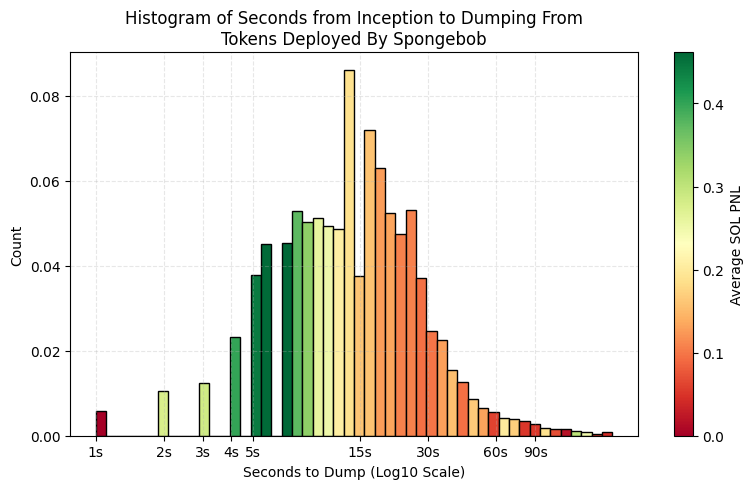

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Load data
df = pd.read_csv("data/6ddr_token_launchstats.csv")

# Filter seconds_to_dump
min_seconds = 0
max_seconds = 200
mask = (df['seconds_to_dump'] > min_seconds) & (df['seconds_to_dump'] < max_seconds) & (df['seconds_to_dump'].notna())
filtered_df = df[mask].copy()

# Cap sol_pnl at 99th percentile
filtered_df.loc[filtered_df['sol_pnl'] > filtered_df['sol_pnl'].quantile(0.99), 'sol_pnl'] = filtered_df['sol_pnl'].quantile(0.99)

# Extract data
data = filtered_df['seconds_to_dump']
sol_pnl = filtered_df['sol_pnl']
log_data = np.log10(data)

# Bin log_data
bins = 50
hist, bin_edges = np.histogram(log_data, bins=bins)
bin_indices = np.digitize(log_data, bin_edges[:-1], right=True)

total_coins = len(filtered_df)
hist = hist / total_coins

# Calculate average sol_pnl per bin
avg_pnl_per_bin = np.zeros(len(bin_edges) - 1)
for i in range(len(bin_edges) - 1):
    mask = (bin_indices == i + 1)
    if np.sum(mask) > 0:
        avg_pnl_per_bin[i] = sol_pnl[mask].mean()
    else:
        avg_pnl_per_bin[i] = 0

# Normalize for coloring
norm = Normalize(vmin=np.min(avg_pnl_per_bin), vmax=np.max(avg_pnl_per_bin))
cmap = cm.RdYlGn
colors = cmap(norm(avg_pnl_per_bin))

# Custom tick labels
def log_tick_labels():
    tick_values = [1,2,3,4, 5,15, 30, 60,90]  # Seconds
    ticks = np.log10(tick_values)  # Log10 for x-axis
    labels = [f"{val}s" for val in tick_values]  # Labels as strings
    return ticks, labels

ticks, labels = log_tick_labels()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(hist)):
    ax.bar(
        bin_edges[i],
        hist[i],
        width=np.diff(bin_edges)[i],
        align='edge',
        color=colors[i],
        edgecolor='black'
    )

# Customize
ax.set_xlabel("Seconds to Dump (Log10 Scale)")
ax.set_ylabel("Count")
ax.set_title("Histogram of Seconds from Inception to Dumping From\nTokens Deployed By Spongebob")
ax.set_xticks(ticks=ticks, labels=labels)
ax.grid(True, linestyle='--', alpha=0.3)  # Add grid for readability

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label="Average SOL PNL")

plt.tight_layout()
plt.show()

# 6

In [ ]:
import pandas as pd
import glob
from tqdm import tqdm

CREATOR = "6d22FozaKK239PoBYVffkYKA1QPQZE8fC7AQkpmHQfjp"
SOL_ADDR = "So11111111111111111111111111111111111111112"


coins = glob.glob("coin_history_6ddr/*.csv")
num_from_sol_swaps = []
num_to_sol_swaps = []

for coin_path in tqdm(coins):
    df = pd.read_csv(coin_path)
    t = df[df.swapper == CREATOR]

    from_sol_swaps = len(t[t.from_mint == SOL_ADDR])
    to_sol_swaps = len(t[t.to_mint == SOL_ADDR])

    num_from_sol_swaps.append(from_sol_swaps)
    num_to_sol_swaps.append(to_sol_swaps)


print(sum((pd.Series(num_from_sol_swaps) == 1) & (pd.Series(num_to_sol_swaps) == 1)) / len(coins))


df = pd.read_csv("data/6ddr_token_launchstats.csv")
print(df.seconds_to_dump.mean())
print(df.seconds_to_dump.median())



100%|██████████| 26335/26335 [00:20<00:00, 1272.79it/s]

0.9690525916081261


# Fig 7

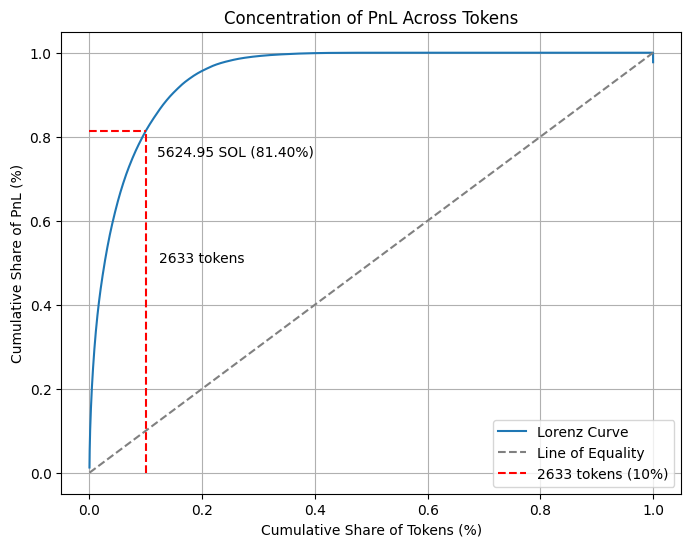

In [10]:
# how concentrated are the gain?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/6ddr_token_launchstats.csv")



df_sorted = df.sort_values('sol_pnl', ascending=False).reset_index(drop=True)

# Calculate cumulative PnL
cumulative_pnl = np.cumsum(df_sorted['sol_pnl'])
total_pnl = cumulative_pnl.max()  # Should match df.sol_pnl.sum(), ~6910.34

# Normalize to get percentage of total PnL
cumulative_pnl_pct = cumulative_pnl / total_pnl

# Cumulative percentage of tokens
n_tokens = len(df)  # 26334
cumulative_tokens_pct = np.arange(1, n_tokens + 1) / n_tokens

# Plot the Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(cumulative_tokens_pct, cumulative_pnl_pct, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Line of Equality')

# Define the 10% and 20% token shares
ten_percent_tokens = 0.1  # 10% of tokens

# Calculate actual number of tokens for labeling
ten_percent_token_count = int(0.1 * n_tokens)  # 2633

# Find the corresponding y-values (cumulative PnL %) at 10% and 20% of tokens
ten_percent_idx = int(0.1 * n_tokens)
ten_percent_pnl = cumulative_pnl_pct[ten_percent_idx]

# Draw red dotted lines from x-axis to the intersection point
plt.plot([ten_percent_tokens, ten_percent_tokens], [0, ten_percent_pnl], 
         color='red', linestyle='--', label=f'{ten_percent_token_count} tokens (10%)')

# Draw red dotted lines from y-axis to the intersection point
plt.plot([0, ten_percent_tokens], [ten_percent_pnl, ten_percent_pnl], 
         color='red', linestyle='--')


plt.text(ten_percent_tokens+0.1, 0.5, f'{ten_percent_token_count} tokens', color='black', ha='center')

plt.text(0.12, ten_percent_pnl-0.05, f'{ten_percent_pnl * df.sol_pnl.sum():.2f} SOL ({ten_percent_pnl:.2%})', 
         color='black', va='center')

# Customize the plot
plt.xlabel('Cumulative Share of Tokens (%)')
plt.ylabel('Cumulative Share of PnL (%)')
plt.title('Concentration of PnL Across Tokens')
plt.legend()
plt.grid(True)
plt.show()

# Fig 8

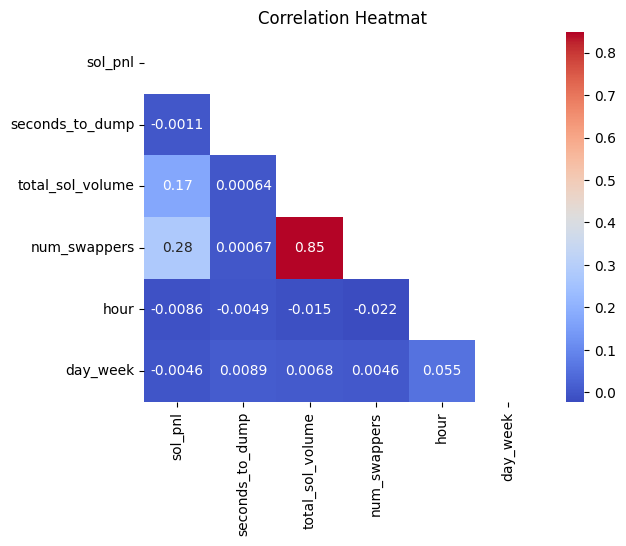

In [6]:
#df = pd.read_csv("data/6ddr_token_launch_stats.csv")
df = pd.read_csv("impact_analysis_corrected/coin_metrics_corrected_single_creator.csv")

df['creation_timestamp'] = pd.to_datetime(df['creation_timestamp'])
df = df[df['sol_pnl'] > -1]

df['hour'] = df.creation_timestamp.dt.hour
df['day_week'] = df.creation_timestamp.dt.day_of_week

#df = df[df['sol_pnl'] > df['sol_pnl'].quantile(0.8)]
corr = df[['sol_pnl','seconds_to_dump','total_sol_volume','num_swappers','hour','day_week']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,cmap="coolwarm",mask=mask)

plt.title('Correlation Heatmat')
plt.show()

# Fig 9

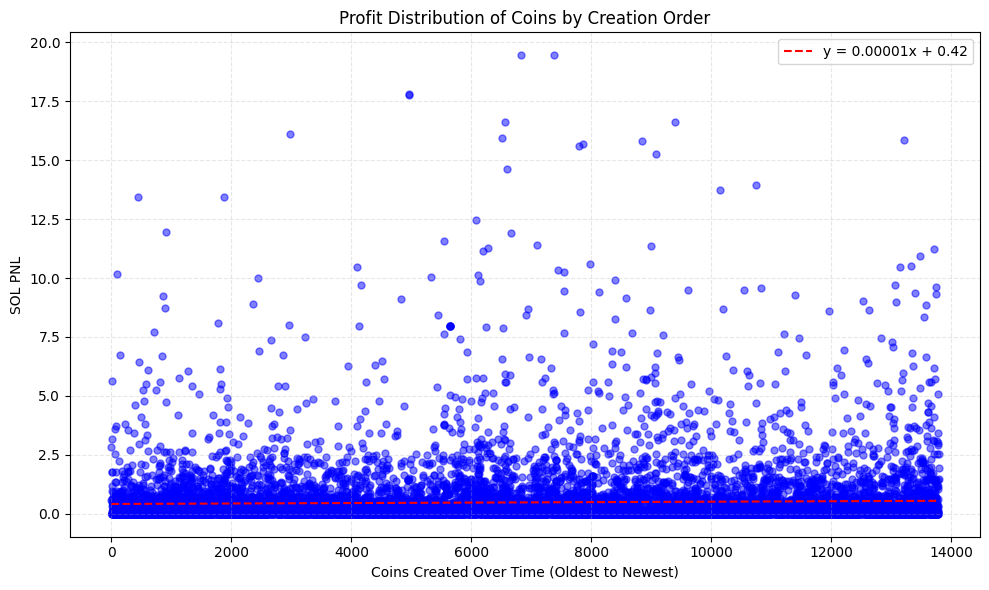

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/6ddr_token_launchstats.csv")
df_filtered = df[(df['sol_pnl'] > 0) & (df['sol_pnl'] < 20)]
df_filtered = df_filtered.sort_values('creation_timestamp').reset_index(drop=True)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure for clarity
ax.scatter(
    x=df_filtered.index,  # Index reflects creation order
    y=df_filtered['sol_pnl'],
    color='blue',
    alpha=0.5,  # Transparency to see overlapping points
    s=25  # Point size for visibility
)
# Extract x and y values for the line of best fit
x = df_filtered.index
y = df_filtered['sol_pnl']
m, b = np.polyfit(x, y, 1)  # Slope and intercept
y_fit = m * x + b
ax.plot(x, y_fit, color='red', linestyle='--', label=f'y = {m:.5f}x + {b:.2f}')

# Customize plot
ax.set_xlabel("Coins Created Over Time (Oldest to Newest)")
ax.set_ylabel("SOL PNL")
ax.set_title("Profit Distribution of Coins by Creation Order")
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()
plt.show()

# Fig 10

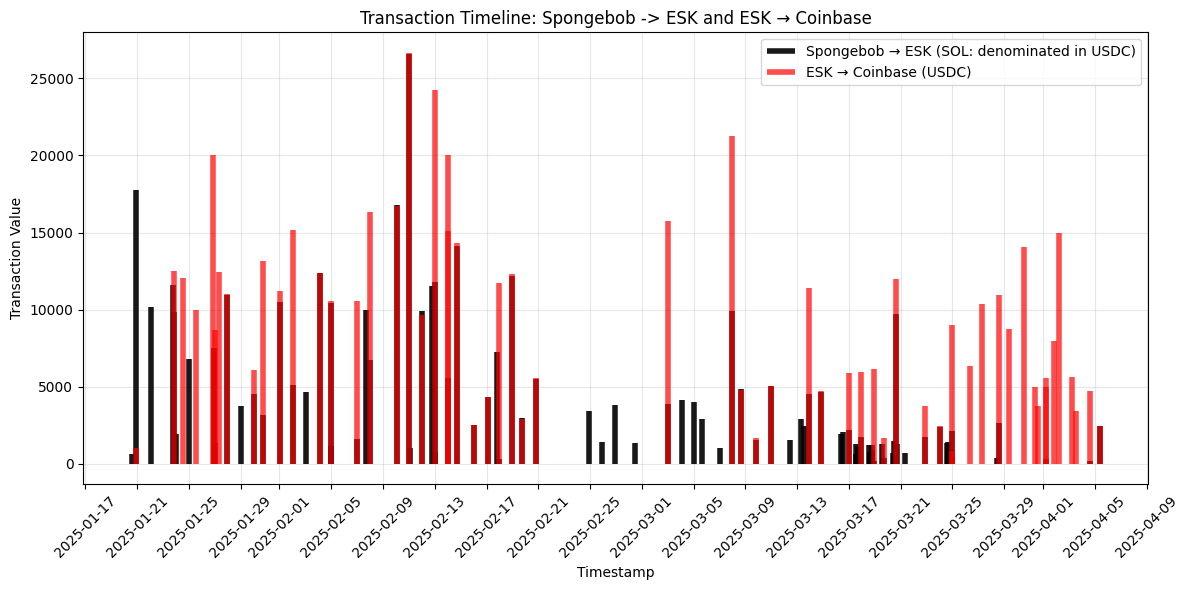

In [43]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt


spg2esk = pd.read_csv("data/spongebob2esk.csv")
spg2esk['sol'] = spg2esk['Amount'] / 1e9
spg2esk['Time'] = pd.to_datetime(spg2esk['Time'],unit='s',utc=True)
spg2esk.sort_values(by='Time').reset_index(drop=True)
spg2esk = spg2esk[spg2esk['TokenAddress'] == 'SOL']


esk2cb = pd.read_csv("data/esk2coinbaseSOL.csv")
esk2cb['blockTimestamp'] = pd.to_datetime(esk2cb['blockTimestamp'])
esk2cb = esk2cb[['blockTimestamp','unitValue']].sort_values('blockTimestamp').rename(columns={'unitValue':'usdc'}).reset_index(drop=True)


ab_times = spg2esk['Time']
ab_values = spg2esk['Value']

# For B→C, we'll use 'blockTimestamp' and 'usdc'
bc_times = esk2cb['blockTimestamp']
bc_values = esk2cb['usdc']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot A→B transactions as blue vertical lines
plt.vlines(ab_times, ymin=0, ymax=ab_values, colors='black', label='Spongebob → ESK (SOL: denominated in USDC)', alpha=0.9,linewidth=4)

# Plot B→C transactions as red vertical lines
plt.vlines(bc_times, ymin=0, ymax=bc_values, colors='red', label='ESK → Coinbase (USDC)', alpha=0.7,linewidth=4)

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Transaction Value')
plt.title('Transaction Timeline: Spongebob -> ESK and ESK → Coinbase')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
#$plt.locator_params(axis='x', nbins=40)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=10, maxticks=30))  # More frequent date ticks
plt.tight_layout()

# Show the plot
plt.show()

# 11

In [ ]:
import pandas as pd
df = pd.read_csv("data/esk_token_launchstats.csv")


len(df[(df.creator_from_sol_swaps == 1) & (df.creator_to_sol_swaps == 1)]) / len(df)

0.9699537518265768

# Fig 12

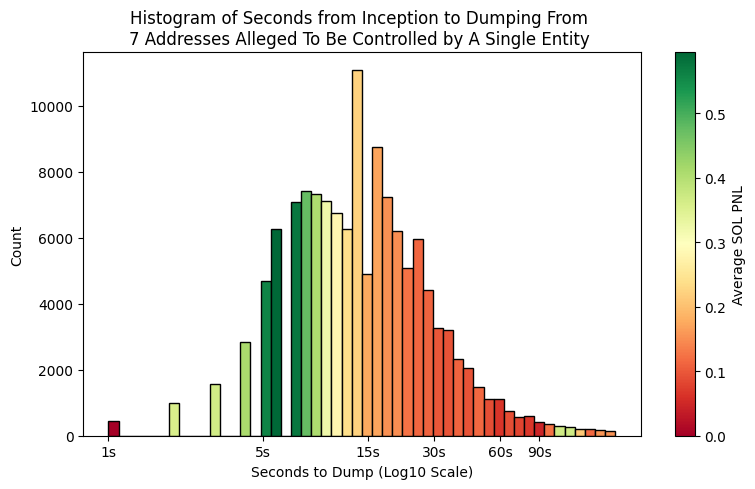

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.colors import Normalize

df = pd.read_csv("data/esk_token_lauchstats.csv")


# Filter seconds_to_dump
min_seconds = 0
max_seconds = 200
mask = (df['seconds_to_dump'] > min_seconds) & (df['seconds_to_dump'] < max_seconds) & (df['seconds_to_dump'].notna())
filtered_df = df[mask].copy()

# Cap sol_pnl at 99th percentile
filtered_df.loc[filtered_df['sol_pnl'] > filtered_df['sol_pnl'].quantile(0.99), 'sol_pnl'] = filtered_df['sol_pnl'].quantile(0.99)

# Extract data
data = filtered_df['seconds_to_dump']
sol_pnl = filtered_df['sol_pnl']
log_data = np.log10(data)

# Bin log_data
bins = 50
hist, bin_edges = np.histogram(log_data, bins=bins)
bin_indices = np.digitize(log_data, bin_edges[:-1], right=True)

# Calculate average sol_pnl per bin
avg_pnl_per_bin = np.zeros(len(bin_edges) - 1)
for i in range(len(bin_edges) - 1):
    mask = (bin_indices == i + 1)
    if np.sum(mask) > 0:
        avg_pnl_per_bin[i] = sol_pnl[mask].mean()
    else:
        avg_pnl_per_bin[i] = 0

# Normalize for coloring
norm = Normalize(vmin=np.min(avg_pnl_per_bin), vmax=np.max(avg_pnl_per_bin))
cmap = cm.RdYlGn
colors = cmap(norm(avg_pnl_per_bin))

# Custom tick labels
def log_tick_labels():
    tick_values = [1, 5,15, 30, 60,90]  # Seconds
    ticks = np.log10(tick_values)  # Log10 for x-axis
    labels = [f"{val}s" for val in tick_values]  # Labels as strings
    return ticks, labels

ticks, labels = log_tick_labels()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(hist)):
    ax.bar(
        bin_edges[i],
        hist[i],
        width=np.diff(bin_edges)[i],
        align='edge',
        color=colors[i],
        edgecolor='black'
    )
# Customize the plot
ax.set_xlabel("Seconds to Dump (Log10 Scale)")
ax.set_ylabel("Count")
ax.set_title("Histogram of Seconds from Inception to Dumping From \n7 Addresses Alleged To Be Controlled by A Single Entity ")
ax.set_xticks(ticks=ticks, labels=labels)

# Add a colorbar to show the mapping of colors to sol_pnl
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label="Average SOL PNL")

plt.tight_layout()
plt.show()

# FIG 13

36DW 15.0
MNhB (Elvis) 14.0
B8xT 14.0
5Hyf 13.0
6d22 (Spongebob) 14.0
C88r 14.0
83QQ 13.0


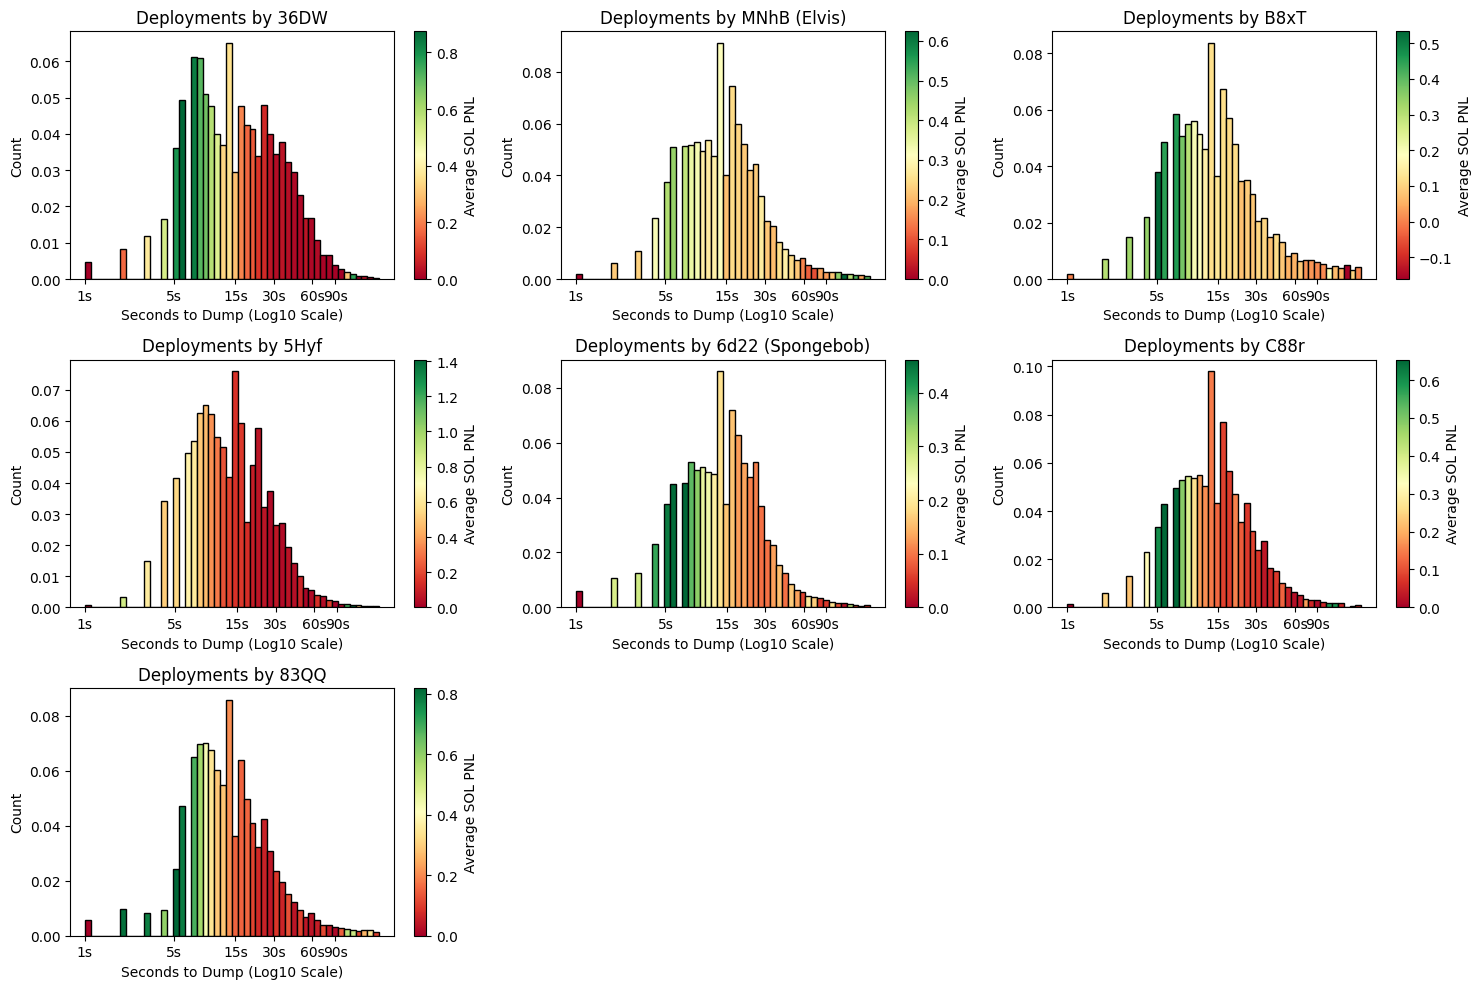

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Load data
df = pd.read_csv("data/esk_token_lauchstats.csv")
addrs = df.creator_address.unique().tolist()

# Condense wallet names to first 4 characters (for consistency with heatmaps)
short_addrs = [addr[:4] for addr in addrs]



# Create a 3x3 subplot grid (7 histograms + 2 empty spaces)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Process each address and plot its histogram
for idx, (addr, short_addr) in enumerate(zip(addrs, short_addrs)):


    if short_addr == 'MNhB':
        short_addr = "MNhB (Elvis)"
    if short_addr == "6d22":
        short_addr =  "6d22 (Spongebob)"


    # Filter seconds_to_dump
    min_seconds = 0
    max_seconds = 200
    mask = (df['seconds_to_dump'] > min_seconds) & (df['seconds_to_dump'] < max_seconds) & (df['seconds_to_dump'].notna())
    filtered_df = df[mask].copy()
    filtered_df = filtered_df[filtered_df['creator_address'] == addr]

    # Cap sol_pnl at 99th percentile
    filtered_df.loc[filtered_df['sol_pnl'] > filtered_df['sol_pnl'].quantile(0.99), 'sol_pnl'] = filtered_df['sol_pnl'].quantile(0.99)

    # Extract data
    data = filtered_df['seconds_to_dump']
    print(short_addr,data.median())
    sol_pnl = filtered_df['sol_pnl']
    log_data = np.log10(data)

    # Bin log_data
    bins = 50
    hist, bin_edges = np.histogram(log_data, bins=bins)
    bin_indices = np.digitize(log_data, bin_edges[:-1], right=True)

    total_coins = len(filtered_df)
    hist = hist / total_coins

    # Calculate average sol_pnl per bin
    avg_pnl_per_bin = np.zeros(len(bin_edges) - 1)
    for i in range(len(bin_edges) - 1):
        mask = (bin_indices == i + 1)
        if np.sum(mask) > 0:
            avg_pnl_per_bin[i] = sol_pnl[mask].mean()
        else:
            avg_pnl_per_bin[i] = 0

    # Normalize for coloring
    norm = Normalize(vmin=np.min(avg_pnl_per_bin), vmax=np.max(avg_pnl_per_bin))
    cmap = cm.RdYlGn
    colors = cmap(norm(avg_pnl_per_bin))

    # Custom tick labels
    def log_tick_labels():
        tick_values = [1, 5, 15, 30, 60, 90]  # Seconds
        ticks = np.log10(tick_values)  # Log10 for x-axis
        labels = [f"{val}s" for val in tick_values]  # Labels as strings
        return ticks, labels

    ticks, labels = log_tick_labels()

    # Plot histogram in the current subplot
    ax = axes[idx]
    for i in range(len(hist)):
        ax.bar(
            bin_edges[i],
            hist[i],
            width=np.diff(bin_edges)[i],
            align='edge',
            color=colors[i],
            edgecolor='black'
        )

    # Customize the subplot
    ax.set_xlabel("Seconds to Dump (Log10 Scale)")
    ax.set_ylabel("Count")
    ax.set_title(f"Deployments by {short_addr}")
    ax.set_xticks(ticks=ticks, labels=labels)

    # Add a colorbar to show the mapping of colors to sol_pnl
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    fig.colorbar(sm, ax=ax, label="Average SOL PNL")

# Remove empty subplots (if any)aaaa
for idx in range(len(addrs), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Fig 14

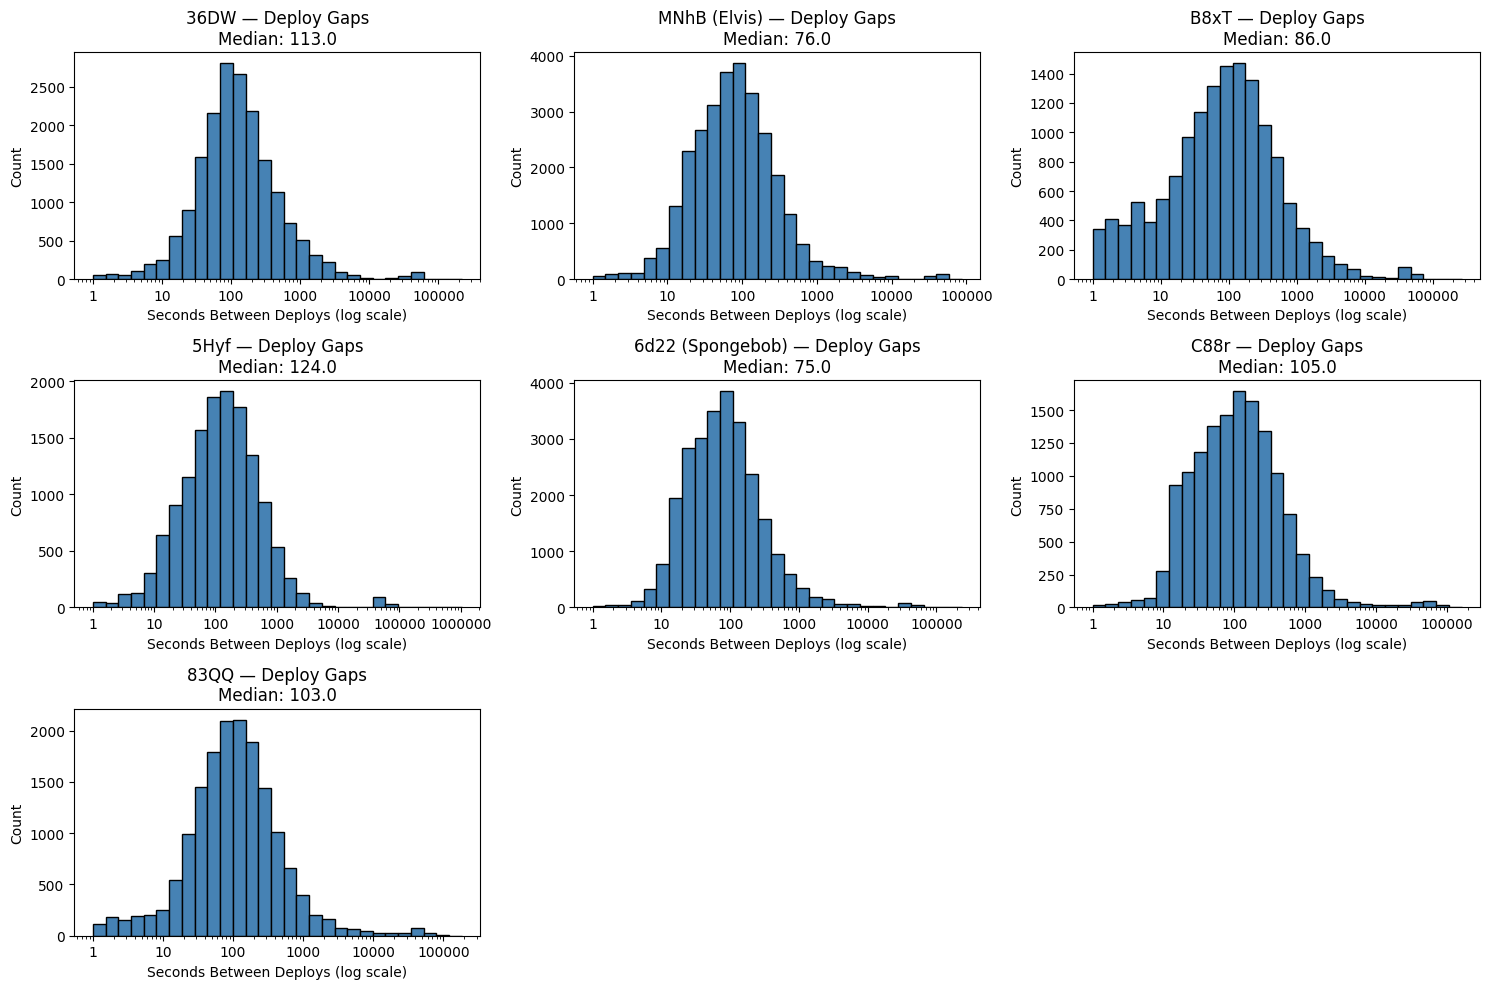

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Load and prep
df = pd.read_csv("data/esk_token_lauchstats.csv")
df['creation_timestamp'] = pd.to_datetime(df['creation_timestamp'])
addrs = df.creator_address.unique().tolist()
short_addrs = [addr[:4] for addr in addrs]

# Subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (addr, short_addr) in enumerate(zip(addrs, short_addrs)):
    if short_addr == 'MNhB':
        short_addr = "MNhB (Elvis)"
    if short_addr == "6d22":
        short_addr =  "6d22 (Spongebob)"

    # Filter and sort
    filtered_df = df[df['creator_address'] == addr].sort_values('creation_timestamp').reset_index(drop=True)
    timestamps = filtered_df['creation_timestamp']
    time_deltas = (timestamps - timestamps.shift(1)).dt.total_seconds().dropna()
    time_deltas = time_deltas[time_deltas > 0]
    
    # Plot
    ax = axes[idx]
    ax.hist(time_deltas, bins=np.logspace(np.log10(1), np.log10(time_deltas.max()), 30),
            color='steelblue', edgecolor='black')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_title(f"{short_addr} — Deploy Gaps\nMedian: {time_deltas.median()}")
    ax.set_xlabel("Seconds Between Deploys (log scale)")
    ax.set_ylabel("Count")

# Remove empty subplots
for i in range(len(addrs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# FIG 15

MNhBbrscBPmeid54buiqSgyWa4D8PY6uKHoK2wJsTJN
6d22FozaKK239PoBYVffkYKA1QPQZE8fC7AQkpmHQfjp
4RePs4EchMosyRENfkUFwZcjgMsdTt9SzYMZomtvRQEi
36DWP52MVRDooYNrcRVDyoCh2R1fPXCYqKJQYg9pFQoE
BwaVFCDJ4HfRfFWq1S23LHkk5VF4GKEw9oz7F1PxgcHv
83QQFLxcEzuJZaejBnzAiW5tyfyaRHMLZnkhJbRPRWtf
B8xTCohpTmuR57pJ8ucKPZfBjdw3Lfkvii4deXRRrL4H
5Hyf6srdbrrD1HLjqxcFbXJRFBHgnwoZc7aZRj8vDuk5
C88rn1cz1PcRJFh44TuynaWbnRis4xuBRi65sD1Nwxog


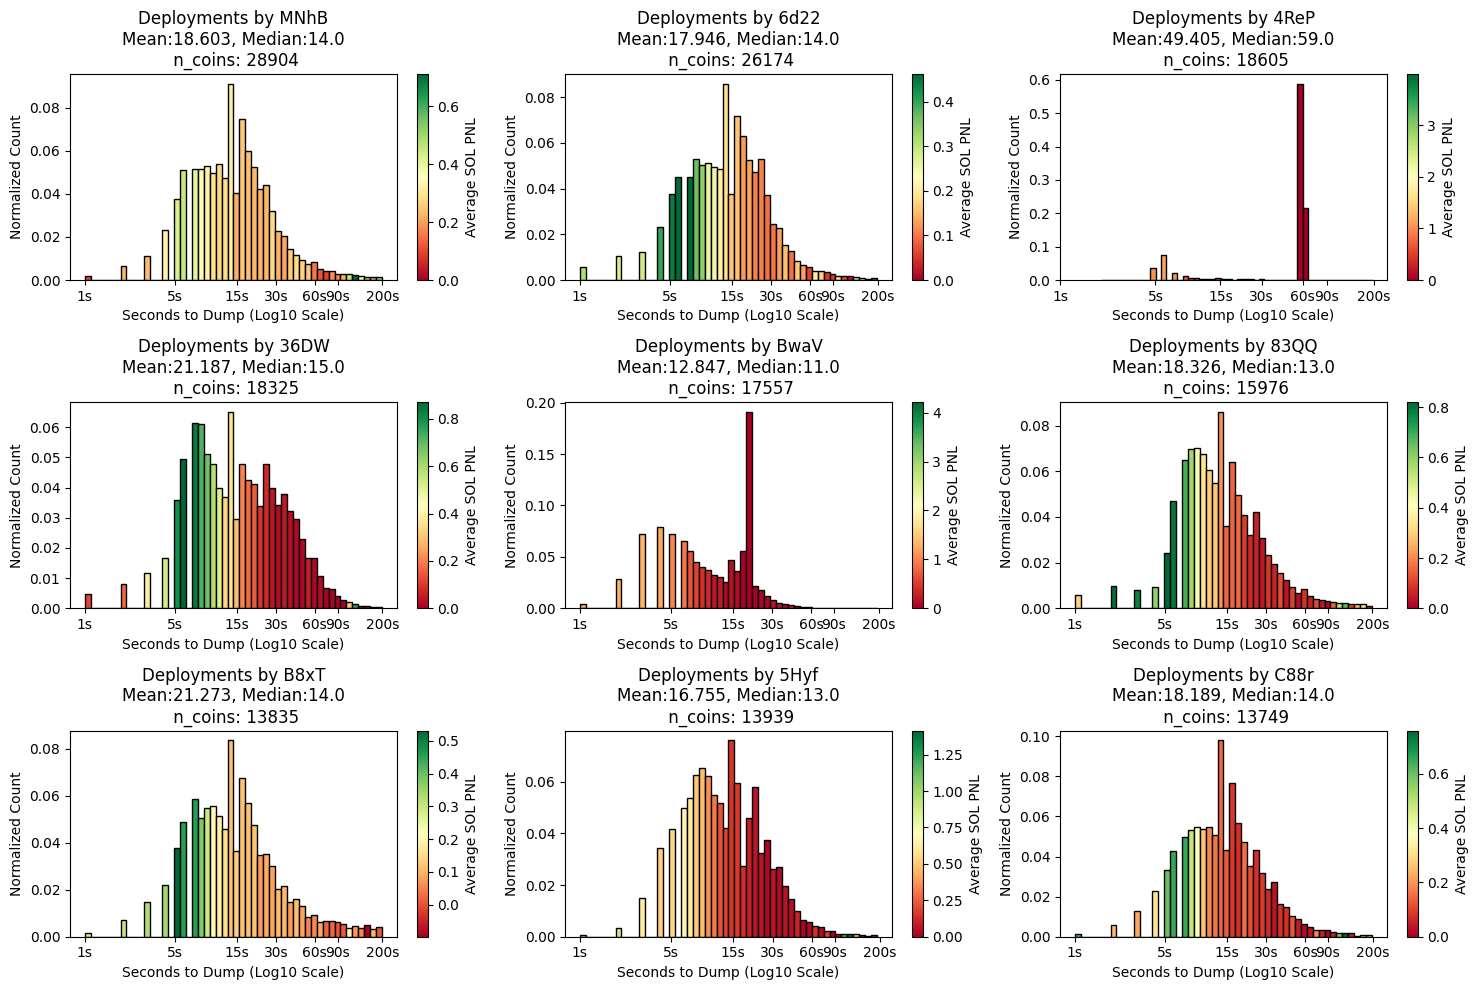

9ZCrb9iKawp1e5Gw3r2BpHpCZQbHFg6DLguzQ5SkP2Eg
Dq3fi8ZmBhkrwHFBChLk2pqV8iAGW9uuJP7coshGzqT6
D3sovmjANgA8V27e5rnQft8kV3mocSH8gw9zwth3Ba9g
3rYj2dThkPHXxX8UNyT6361dqpeQaAU2g3mpZrEwRbnM
BfAgS1vsK2Wja56zxcBrMMdn6sFgTnMmZu3wi4XwiAt3
B9Zbs2W9VK22AHnCWiK4PqBueDFzN17RNAFu5uFozLMJ
Bx7SLBFceTJLrqcBFisb5NmmFCFtXQSm4o1oYpCHuhB9
DUKVDysvzUK5tdfe1Y3kShdEtgHy7j92caUHSHHrECiW
7R3KWHxzCf1eevnqHh4YymyTf4WsVJRwVHjrTGiV5zq1


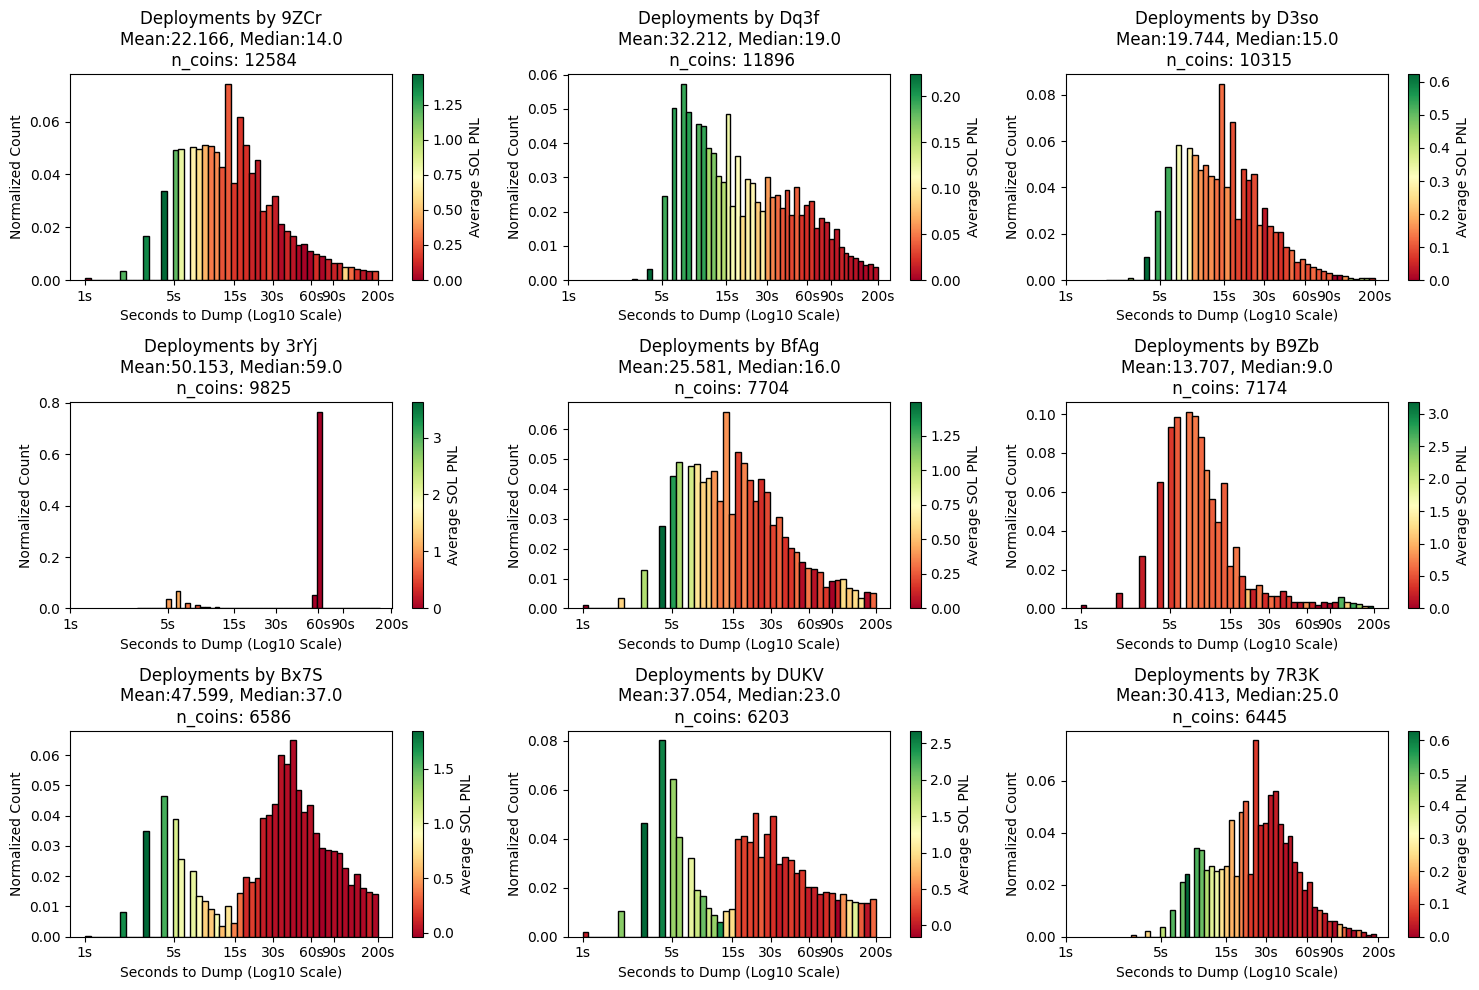

BEnGowz22N6QtVdBCqG53FzYGdPhBqSZmPD3aCgnq4NM
9RaEEUfFwbzNSA6qBpYzew67xBehfT4soKbUR5KuQNJf
E7u2KNuz88y1q9sbS6WrCjmZXMVgUf5wDtzqMweAtacu
8JBqFdE18SF1iayZPHX5mL7cZuhZqFNx3XWeU2Peiz6f
DBsttoy6Eunu4KMyxZMReRgMar6URXWmiYjr5XgML4Qf
C4udGwTg6oqcrr8SmSLmkcXDbaFEcopsiaT21KUE4psU
CVvJnDPcWdmUJN6YC4cHwBS2cJ9T8KoVh3xEwGquHYz1
APVEy4vUEQ3dAvQmuJWXdQ2w13zwQ7ykmxdQP9iivPkJ
GZVSEAajExLJEvACHHQcujBw7nJq98GWUEZtood9LM9b


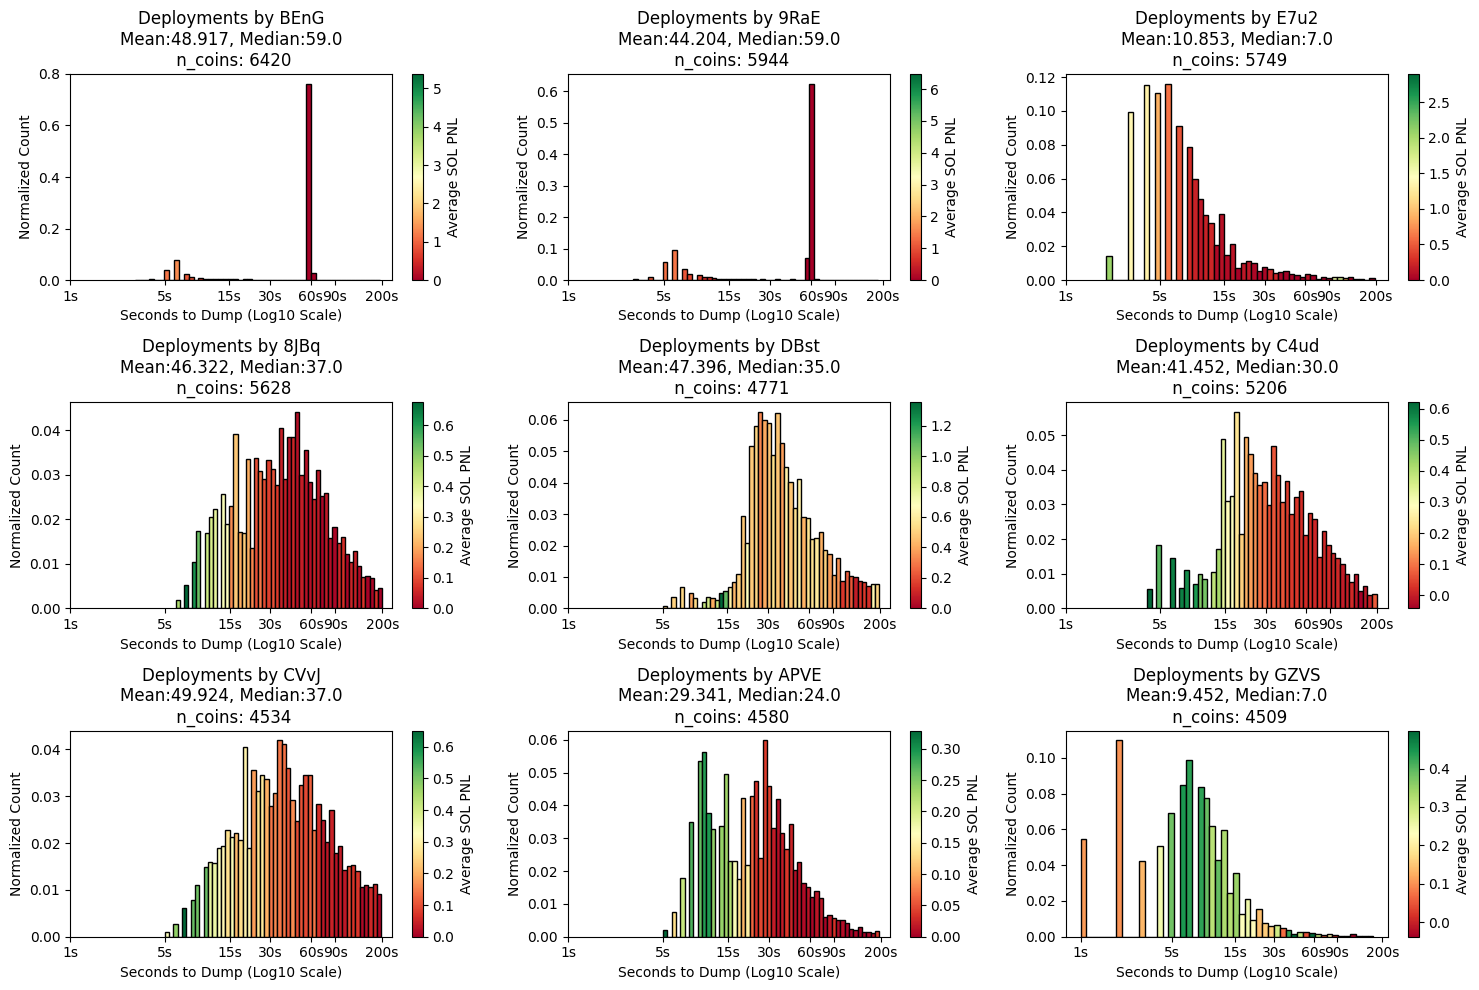

Czw16TyoyxktCSsS1BNXmUdjXTvsWxX6VPqrKUMwS6To
DR7ghPiRVBJ3YeP3FUJRuSa4XaWq4Pkw8ZM4JYs1PyJ9
ER561nUdWcJzCvbykPL34Sv6XzGXiW4y7LP1Nezfvp95
DjXkmBJ99hK33sN8MznifJoW6WEUXyRNskMRT85gt5Du
EKd7ZAUxmbKnTmQxUaX7yVYHUKUYieAvoE5ix79ycxoM
24J2G1aRSRLGrDcGcTq7b5wNxVpkKaJ9AjGnX6yjdTCY
3mL9kH1KqbpFcY9Ry5u9xfZuTSiA2BDTUC6CX9GTLs2w
Cw6cQLB7M4PgTARUTkEdgQSZdcbuSv7jL5EFmVh6r4rP
5wndZMmZzydwLvhhGWcm2pwztDGv6qFcrhwbKjTGeJ4f


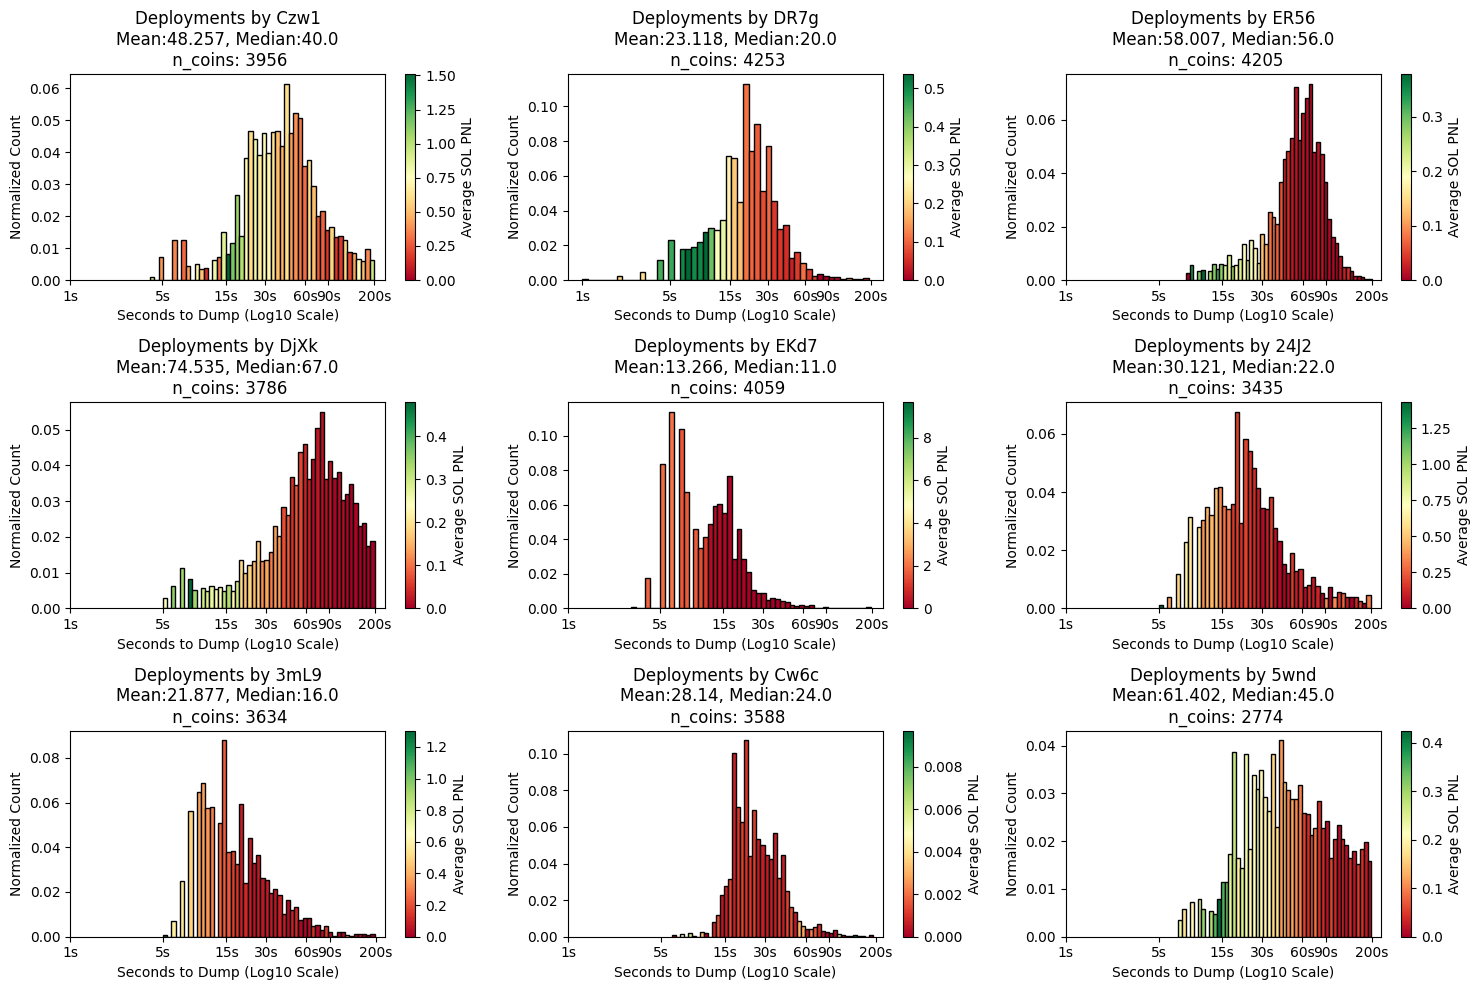

9nNxZ2wWkj46cruV3UA8vTNyJP3arvwDjcdYvAez6BxR
99q4g7RHKh1eD2w95HFSQdakYC6RqmAqEyzptCLN74E4
2zv1i23uwUBv4Zu9A8ZA8PJfLojz5523uekJkRtwTJgM
7m6zpeapVnx52JLqrcEsp56XXN6skUeWMZDUFzDjE2yC
CdHVrkVb4C5wHTyaX1Ugvyp1jDFypvnFXE3bQzxKL63u
EfeBya37moNZQ2T6yjDbachWWZ2cEHfGcBS4vThVFkLd
6WgXuHPo9xWu1Mzt8hULYWFwpyh1WwhByPYjsF23h41A
4Kr8wN4b5VV3p9B9oxdE737oqm2d5pPm7JtLsDpdNKNz
DvYMP4DA4btaTsYwJnYm4kge7cfH25ydtbP2CiGRzQY1


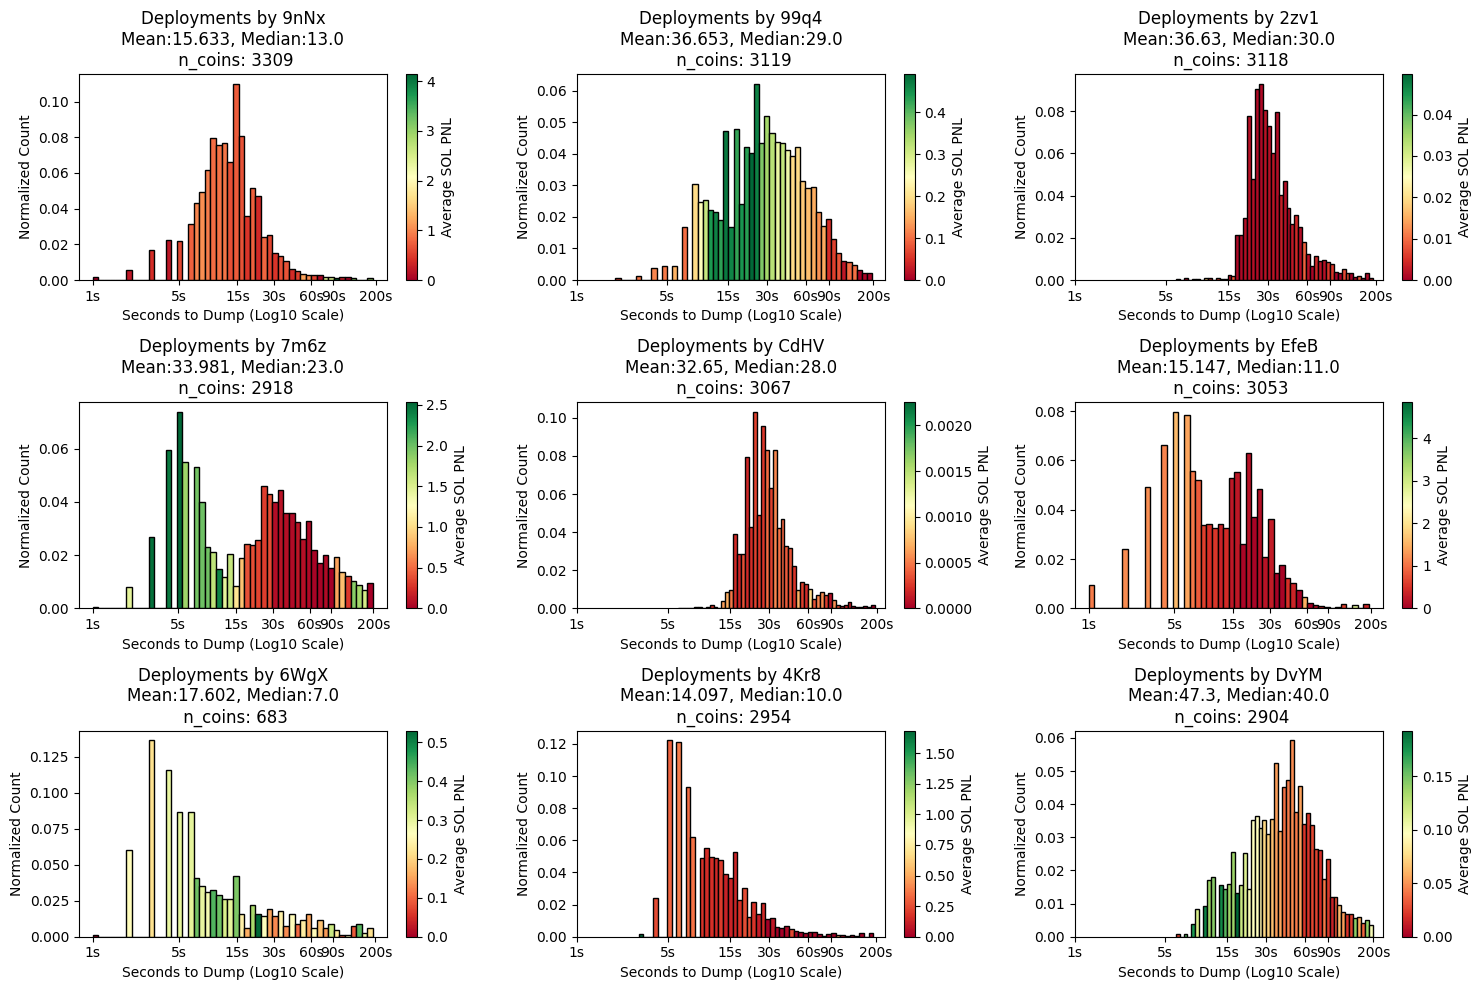

BtDaZUqHr2mKH5EYQCztuerHBuBEfQNYdquTDtEZp2Ym
63EbUyj9a4K86NimRCdpFzobzDUKjAZHa18raKvyqdsA
GNzV2sx87Ua3Pkb2s6hM13CBbHfrgsSHYiB6s8TKBdg8
FNY7kp2QuEJY38wY95hxhWwHe54ZDe3oardKYjiuNqcE
21qj6yRo17y96vFrYEo5dKtgR6HjqW4Adim2XYDMv2CN
FZt2R8haxvyTTmdbJyQvB2sq2aAe92XQW8zksC7vGtr7
3mqbxgQ8UEwNixoGJhuyB5KDwkgN2K5jTbSpccR7bxAp
58uQcUznpk8DsJBMwWkFZPwhcR91nJw1ihyDiThEoLnF
FTJehT8nT8Ar5hXKQKPSJDMSF8evxqQxjnACf7wUcnDp


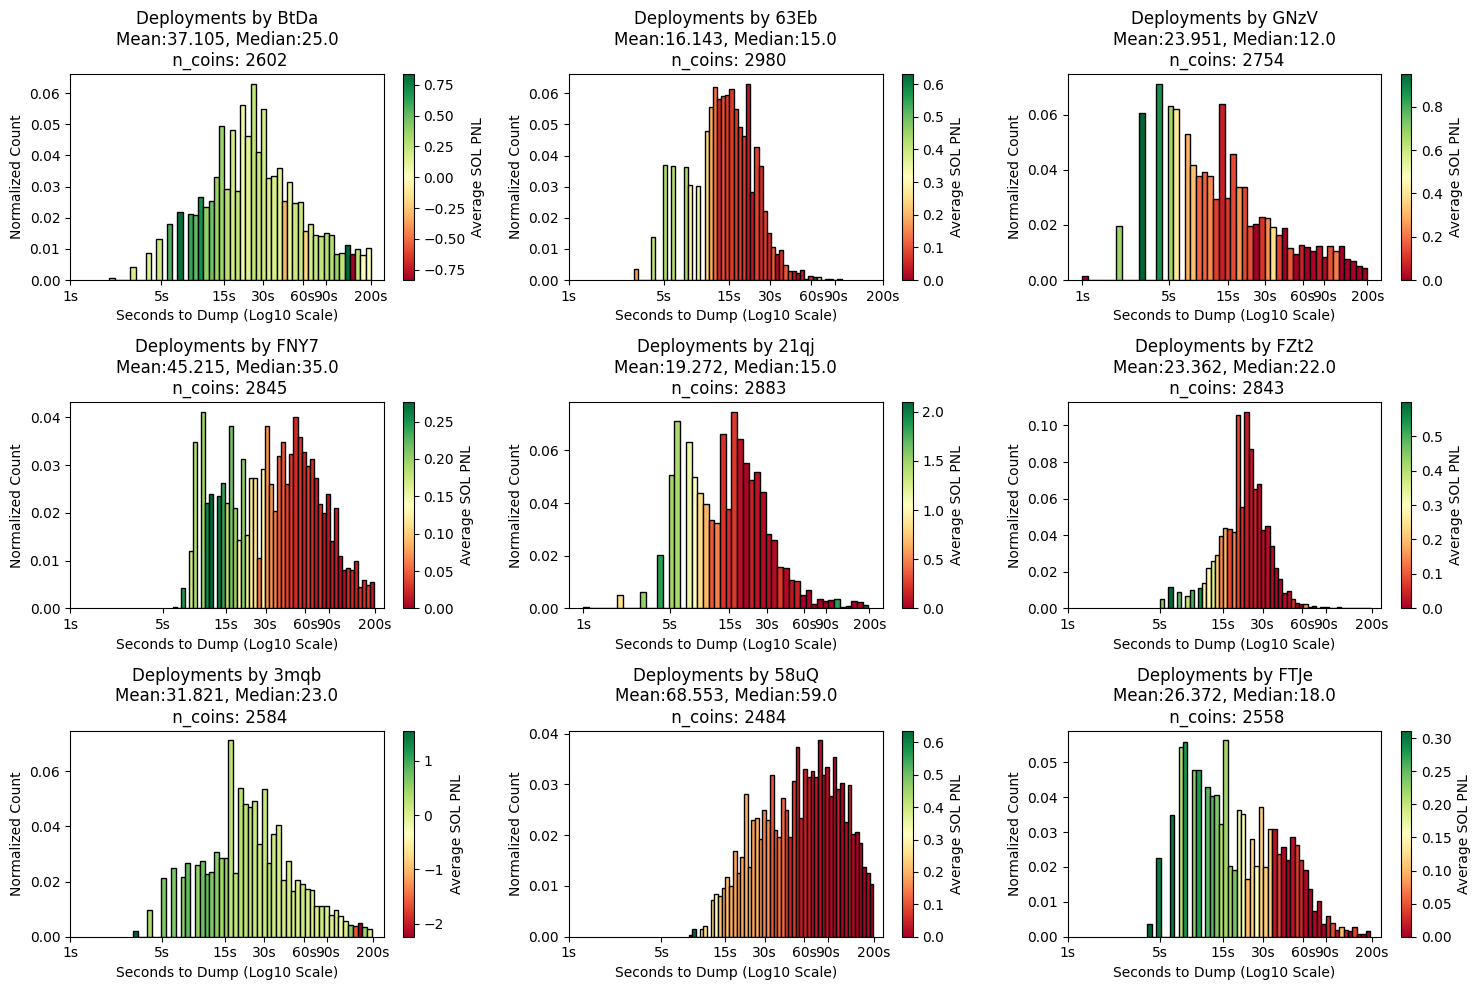

DwLkyeGhL88dMHFQVsNbrXaV8NKPhithse4szKZr3xTn
CEUA7zVoDRqRYoeHTP58UHU6TR8yvtVbeLrX1dppqoXJ
DBSKUS51oysvm9LX81kT3vypKQNjSZMchhubPECMzhcV
DcYNRoV7vprCmS8nf4pmDBzCeVhrFErtPjPbWzdF5Gsm
9pcfJsidozuhAWcnaDCSvNJQ6A6tzRDf4UN7g4upTZrx
H7eoNn4jW2maqWiVxVnCTCWAujZyGknrw4ciu2wGJ6Z6
5WYwniGiyuTm9QtTECH1R7cyee5W8zgFp7oy6j3QbNtV
EYeh1jmU9xoxpdEBzyN6ugMeS6aqaYGw2igt4andKjuk
Gfrm6udiftPdF6oN77dmYFq1AoKvNQwtgFBa7N4ojt4Q


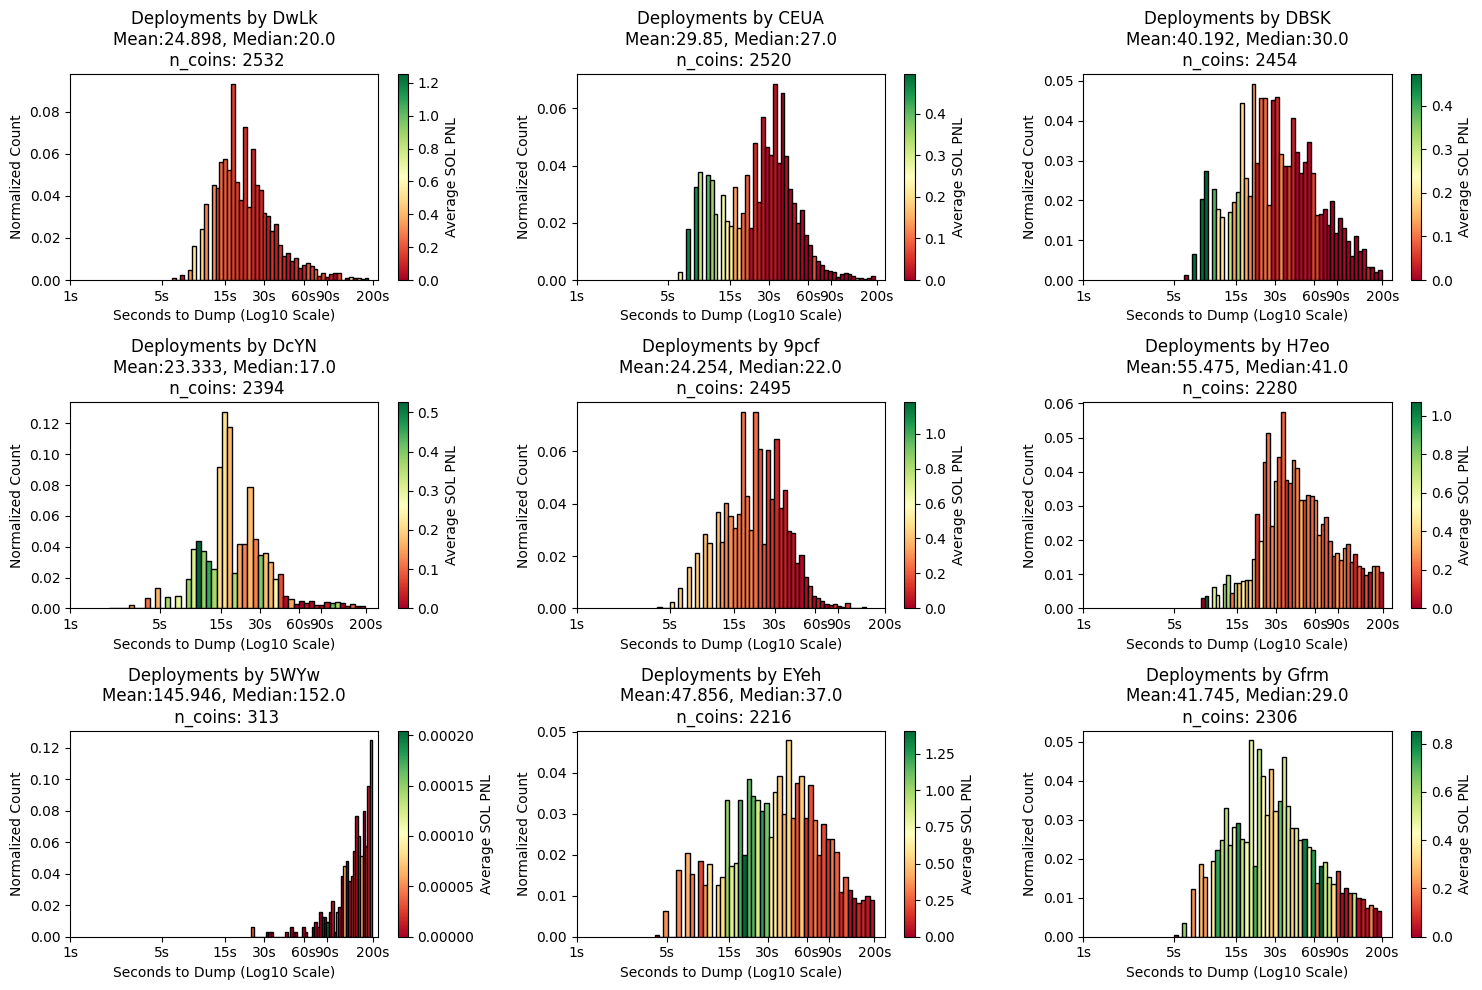

AVsRdizrKsZ3MP5y7bW9Yihr7aBvF4zu4s8s9Ltqm4fu
J5v4hejS2hRAeWcPoEsax2jTj4jJtmo7JNLxgijgpoN3
BfKHhnkVSzPCdY8fyW4RayqDr7FZXRVLRUHtr3kvAhe1
7AZBJFbLghiFBQ7mZFq6ANPMtUcar3Azc7icCf3eYB1A
FJqiMbEQwg6AoAHdTHqFwRcpbSN67zv72gKBh5dfxjTh
9km7F8EoqxtmjJ54AmfESiid6A7WQNkvF6BvpfvZJC62
9gnDS5oNivUzftLJDeAKqcqA3H7t8puiPHabNB3sWk8q
5VED2h4zgN3cjhJWVxQgS4pLmo53HCqQrrFBStG7i4uo
6rXTgb8dp7FaavXt11qjRd9KzGHzCJtgBxupo9phS4Sg


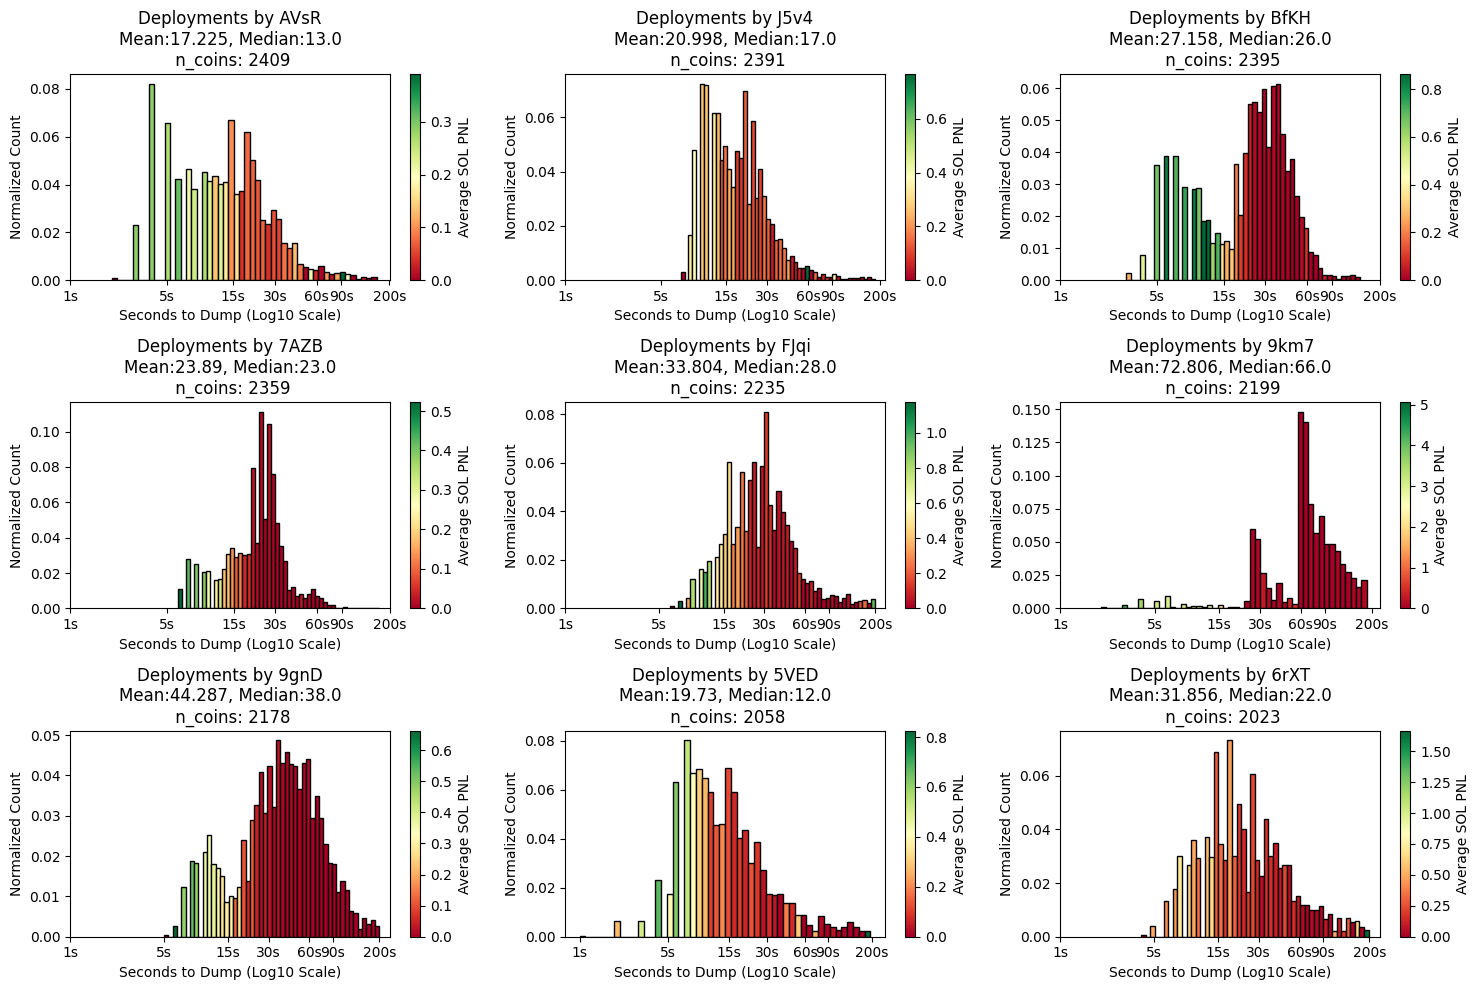

DhPzAN3UQZcKxqh5e9Nk7xD8jYVR9W5QZ9Yfo3F1ydkY
FjeaKDFAgexEPZbAFHwE4cL1MFvn1o6EL1qehcmVStCX
ARuJrNERmFxdNLU9BLeWLEKWJweUMdcF7bJJdGfGsY47
FmkKSQHYXScWgJcF9KPQ3VsJ1yX5CZ7UoH1JrZpCMf4g
GKi4U67uY5SKHDPMzpXDy1FU6gAetGcyuqC8aWY72SFj
EBbQ8XAa5MztUx1zbKhaNKKwcvNGxovdF7rG6iHZ2aun
GdRSPexhxbQz5H2zFQrNN2BAZUqEjAULBigTPvQ6oDMP
3eosqvAzuAX5PDMDcLbgoaJdw45Gr3niL1GZsjE66sJY
DCWFXmVxofgsFi8zUvrHfP4zUTyJpk3uC5Vw3siSjuac


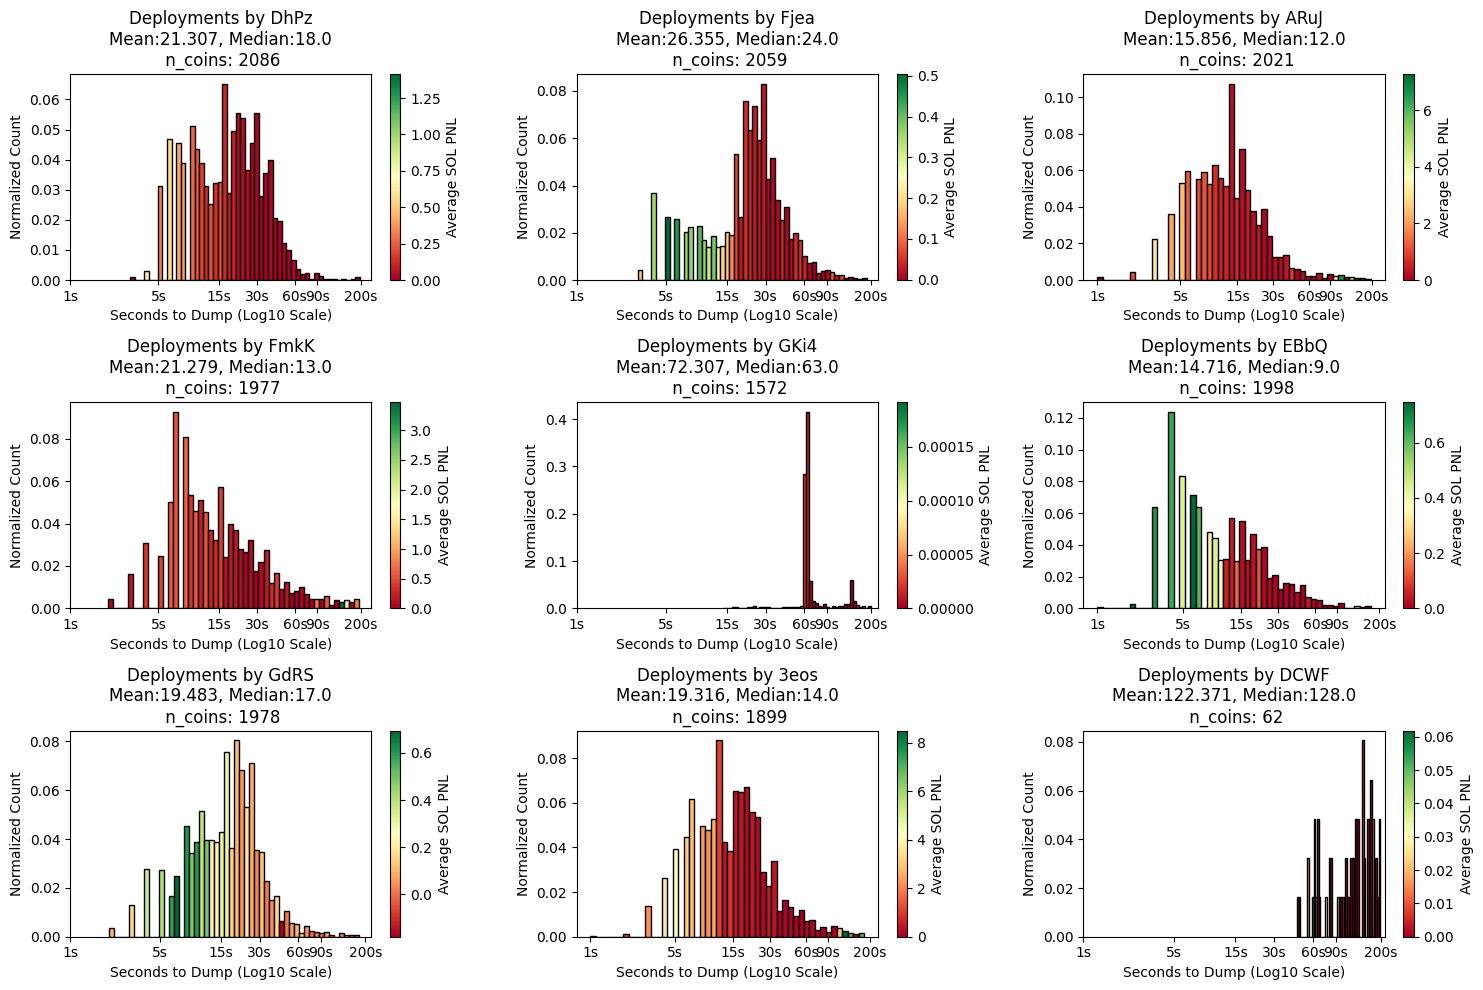

2iUsVToNZ5wxJ93epq4trrSaRFQviTNd9z6d5qNoipzp
6Wkq1znNRV2Kf8JmJfhFTT2udrRkJF5pAtYv8ykY3tK6
GoYzFXdR95h8JKyn7rnfRteRwBoxQzYiLBqBYt6oXcJd
2ShHCRYe4stqdLQ4dax8ERX9RhoeDPT6NCcXjzufeUuX
EdvwU6CoszVjbMyTgptMmhGLXTkaPoXcyt64ZAY9s2wc
HavAFP3GPF9Jp7CpqfK8P5HydNhZsBb7Z7w4jRKhpmVP
AxZ7aE7d1vHAabw6z43DzsdZf3ndHxBNsC9Xptx15qSP
8kcDVZfn5KN2mTQSdo72SiZjCyeGoTM2s6n5m96XoV5u
CBprciwsVHdfrjMGjH9psEJTh6ADBFRkpJWjTfMFPsWD


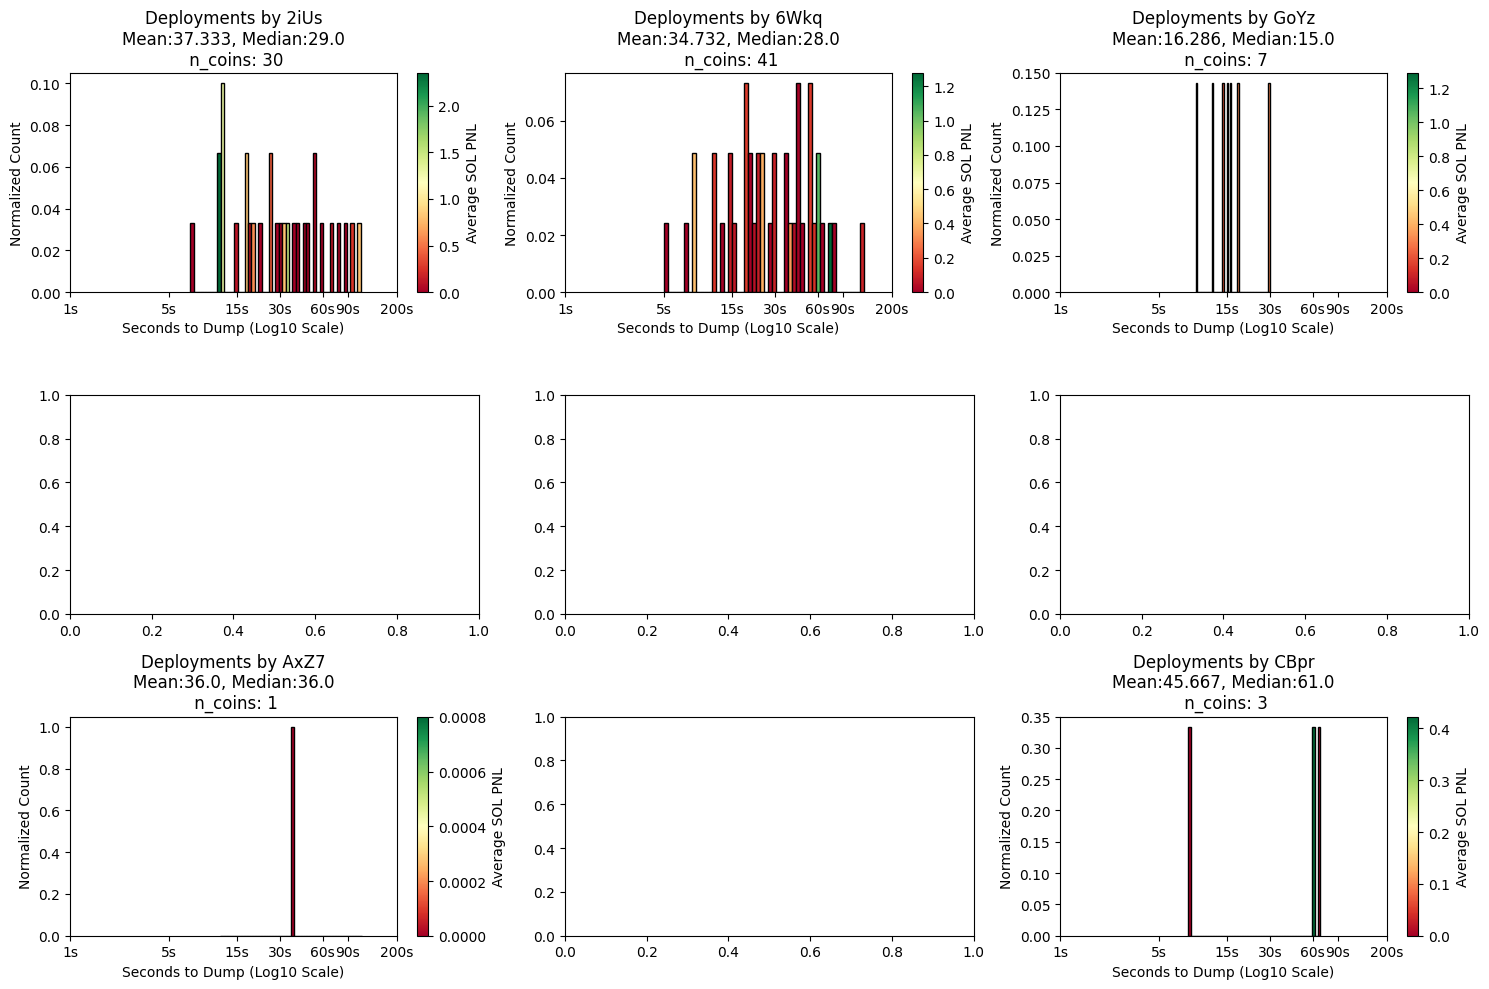

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

df = pd.read_csv("data/top100_creators_allcoins.csv")
df = df[~df.seconds_to_dump.isna()]

creator_counts = df.creator_address.value_counts()
ordered_creators = creator_counts.index.tolist()

creators_per_figure = 9
num_creators = len(ordered_creators)
num_figures = (num_creators + creators_per_figure - 1) // creators_per_figure  # Ceiling division

min_seconds = 0
max_seconds = 200

for fig_num in range(num_figures):
    start_idx = fig_num * creators_per_figure
    end_idx = min(start_idx + creators_per_figure, num_creators)
    current_creators = ordered_creators[start_idx:end_idx]
    
    # Create a 3x3 subplot grid
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten for easier iteration
    
    for idx, creator in enumerate(current_creators):
        # Filter data for this creator
        creator_df = df[df.creator_address == creator]
        
        # Apply filters
        mask = (creator_df['seconds_to_dump'] > min_seconds) & (creator_df['seconds_to_dump'] < max_seconds)
        print(creator)
        filtered_df = creator_df[mask].copy()
        
        # Skip if no data remains after filtering
        if filtered_df.empty:
            continue
        
        # Cap sol_pnl at 99th percentile
        percentile_99 = filtered_df['sol_pnl'].quantile(0.99)
        filtered_df.loc[filtered_df['sol_pnl'] > percentile_99, 'sol_pnl'] = percentile_99
        
        # Extract data
        data = filtered_df['seconds_to_dump']
        n_coins = len(data)
        sol_pnl = filtered_df['sol_pnl']
        mean = round(data.mean(),3)
        median = round(data.median(),3)

        log_data = np.log10(data)
        
        # Bin log_data
        bins = 50
        hist, bin_edges = np.histogram(log_data, bins=bins)
        bin_indices = np.digitize(log_data, bin_edges[:-1], right=True)
        
        # Normalize histogram by total coins
        total_coins = len(filtered_df)
        hist = hist / total_coins if total_coins > 0 else np.zeros_like(hist)
        
        # Calculate average sol_pnl per bin
        avg_pnl_per_bin = np.zeros(len(bin_edges) - 1)
        for i in range(len(bin_edges) - 1):
            mask = (bin_indices == i + 1)
            if np.sum(mask) > 0:
                avg_pnl_per_bin[i] = sol_pnl[mask].mean()
            else:
                avg_pnl_per_bin[i] = 0
        
        # Normalize for coloring
        norm = Normalize(vmin=np.min(avg_pnl_per_bin), vmax=np.max(avg_pnl_per_bin))
        cmap = cm.RdYlGn
        colors = cmap(norm(avg_pnl_per_bin))
        
        # Plot histogram
        ax = axes[idx]
        for i in range(len(hist)):
            ax.bar(
                bin_edges[i],
                hist[i],
                width=np.diff(bin_edges)[i],
                align='edge',
                color=colors[i],
                edgecolor='black'
            )
        
        # Set custom tick labels
        ticks = np.log10([1, 5, 15, 30, 60, 90, 200])
        labels = ['1s', '5s', '15s', '30s', '60s', '90s', '200s']
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels)
        
        # Set titles and labels
        short_addr = creator[:4]
        ax.set_title(f"Deployments by {short_addr}\nMean:{mean}, Median:{median}\n n_coins: {n_coins}")
        ax.set_xlabel("Seconds to Dump (Log10 Scale)")
        ax.set_ylabel("Normalized Count")
        
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        fig.colorbar(sm, ax=ax, label="Average SOL PNL")
    
    # Remove unused subplots
    for idx in range(len(current_creators), len(axes)):
        fig.delaxes(axes[idx])
    
    # Adjust layout and display/save
    plt.tight_layout()
    # plt.savefig(f"histogram_figure_{fig_num}.png")  # Uncomment to save instead of display
    plt.show()

# 16 

In [22]:
df = pd.read_csv("data/top100_creators_allcoins.csv")

df.sol_pnl.sum(), df.usd_pnl.sum(),df.seconds_to_dump.mean() / 60

(np.float64(157523.322894254),
 np.float64(30139328.500000004),
 np.float64(6.346072634886156))

# 17

In [ ]:
import pandas as pd

df = pd.read_csv("data/top100_creators_allcoins.csv")
df['creation_timestamp'] = pd.to_datetime(df['creation_timestamp'])

value_counts = df.creator_address.value_counts()

def calc_mean_delta(timestamps):
    timestamps = timestamps.sort_values()
    deltas = (timestamps - timestamps.shift(1)).dt.total_seconds().dropna()
    deltas = deltas[deltas > 0]
    return deltas.mean() if len(deltas) > 0 else None

agg_cols = [
    'seconds_to_dump', 'sol_pnl', 'usd_pnl', 'total_sol_volume',
    'total_usd_volume', 'num_swappers', 'creator_from_sol_swaps', 'creator_to_sol_swaps'
]

stats = df.groupby('creator_address')[agg_cols].agg(['mean', 'median'])
stats.columns = ['_'.join(col) for col in stats.columns]  
stats['num_tokens'] = value_counts


mean_deltas = df.groupby('creator_address')['creation_timestamp'].apply(calc_mean_delta).rename('mean_time_delta')

df = stats.join(mean_deltas)

df = df.sort_values('num_tokens',ascending=False)

df = df[[
    'num_tokens',
    'mean_time_delta',
    'seconds_to_dump_mean',
 'seconds_to_dump_median',
 'sol_pnl_mean',
 'sol_pnl_median',
 'usd_pnl_mean',
 'usd_pnl_median',
 'total_sol_volume_mean',
 'total_sol_volume_median',
 'total_usd_volume_mean',
 'total_usd_volume_median',
 'num_swappers_mean',
 'num_swappers_median',
 'creator_from_sol_swaps_mean',
 'creator_from_sol_swaps_median',
 'creator_to_sol_swaps_mean',
 'creator_to_sol_swaps_median',
 ]]

#df.to_csv("top100_per_coin_stats.csv")